# RAIN PREDICTION IN AUSTRALIA

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [3]:
pd.set_option("display.max_columns",None)

### import dataset

In [4]:
rain = pd.read_csv('weatherAUS.csv')

In [6]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### data preprocessing

In [7]:
rain.shape

(145460, 23)

In [8]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### find categorical features

In [9]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### find numerical features

In [10]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


#### finding cardinality of categorical features

In [11]:
for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(rain[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


#### feature enginerring of Date column to decrease high cardinality

In [12]:
rain['Date'] = pd.to_datetime(rain['Date'])

In [13]:
rain['Date'].dtype

dtype('<M8[ns]')

In [14]:
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [15]:
rain.drop('Date', axis = 1, inplace = True)

In [16]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<br>

In [18]:
# categorical data: 
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [19]:
# Numerical Features:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


#### checking null or missing values

In [23]:
rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [20]:
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]

#### Filling the missing(Null) categorical features with most frequent value(mode)

In [21]:
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [22]:
rain[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### handling null values in numerical features

In [23]:
rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

<AxesSubplot:>

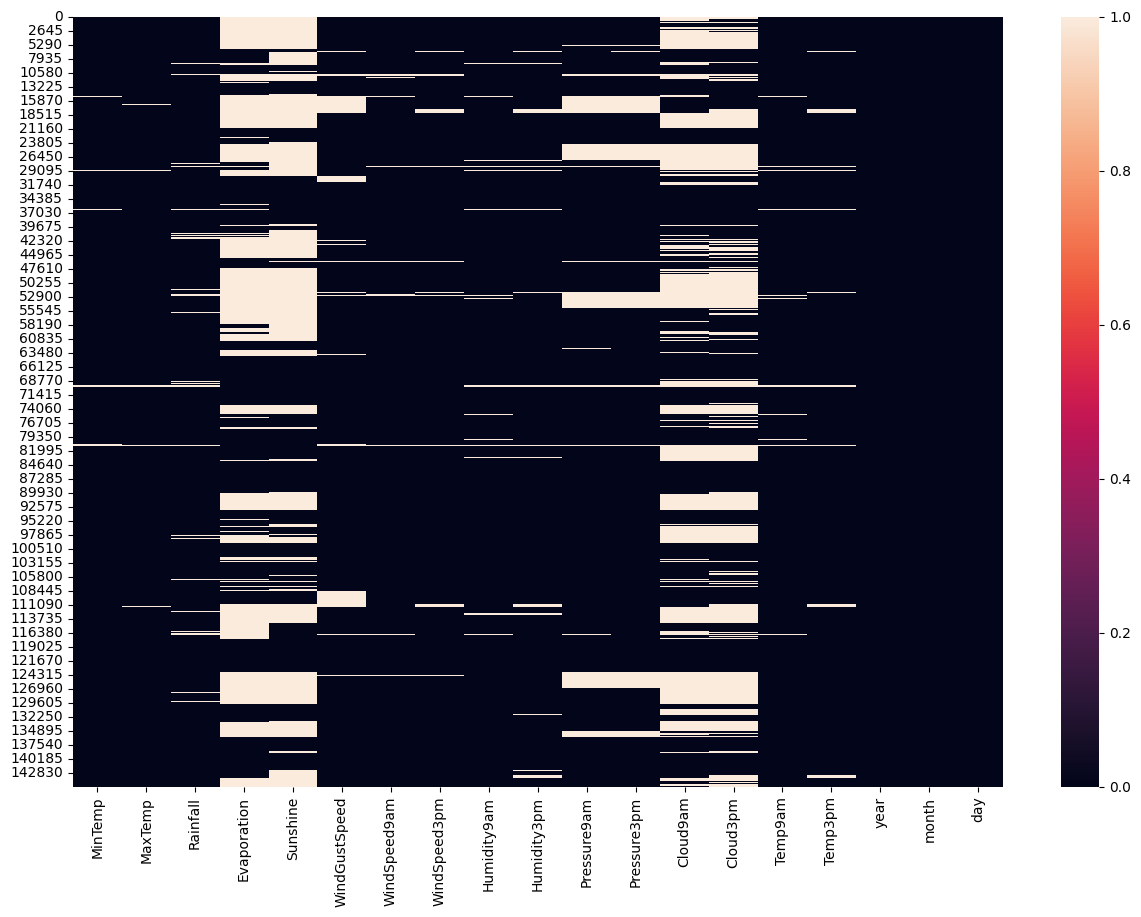

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(),linecolor='white')

#### visualizing null values in numerical features

<AxesSubplot:>

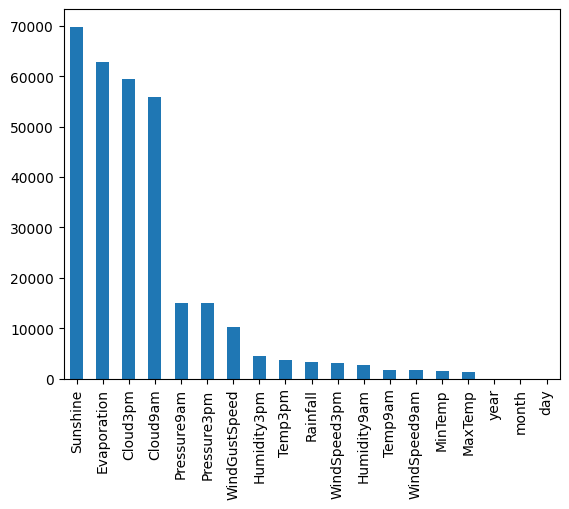

In [25]:
rain[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

#### Checking for outliers in Numerical Features

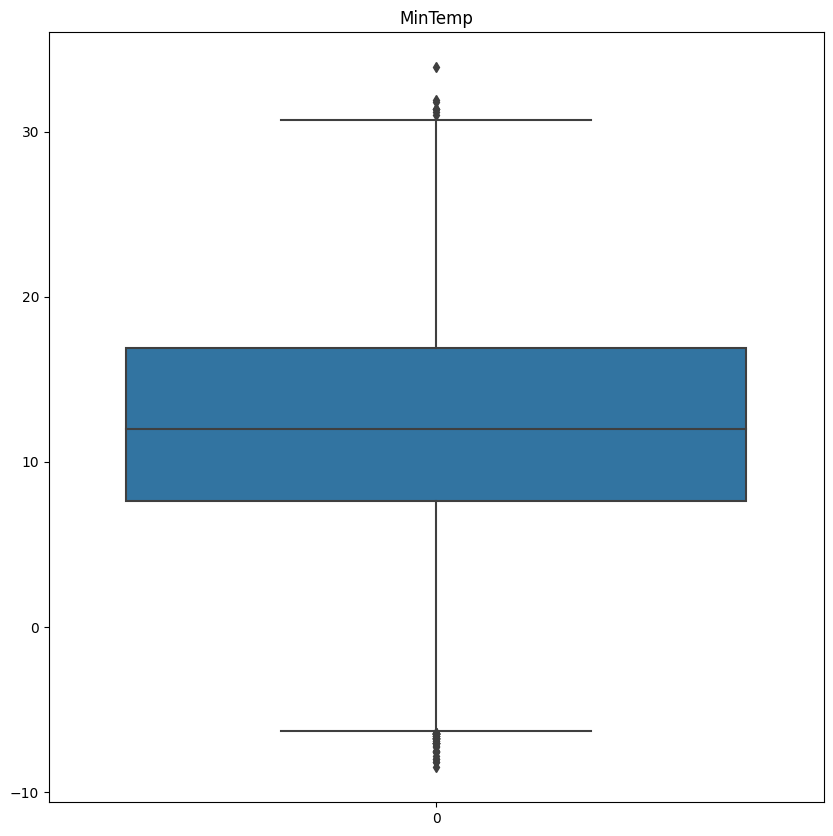

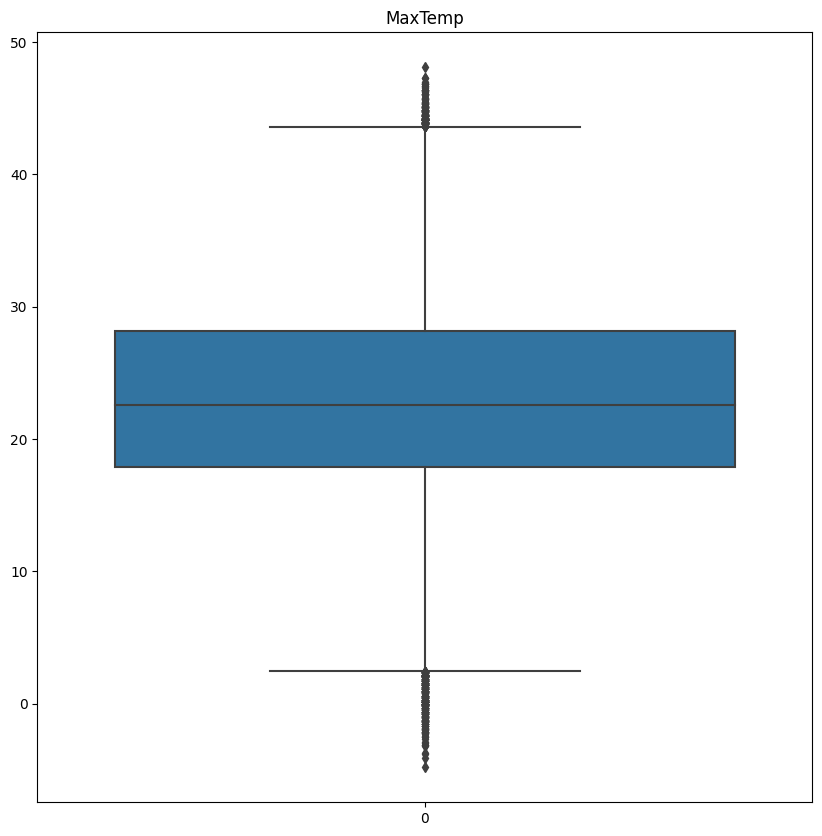

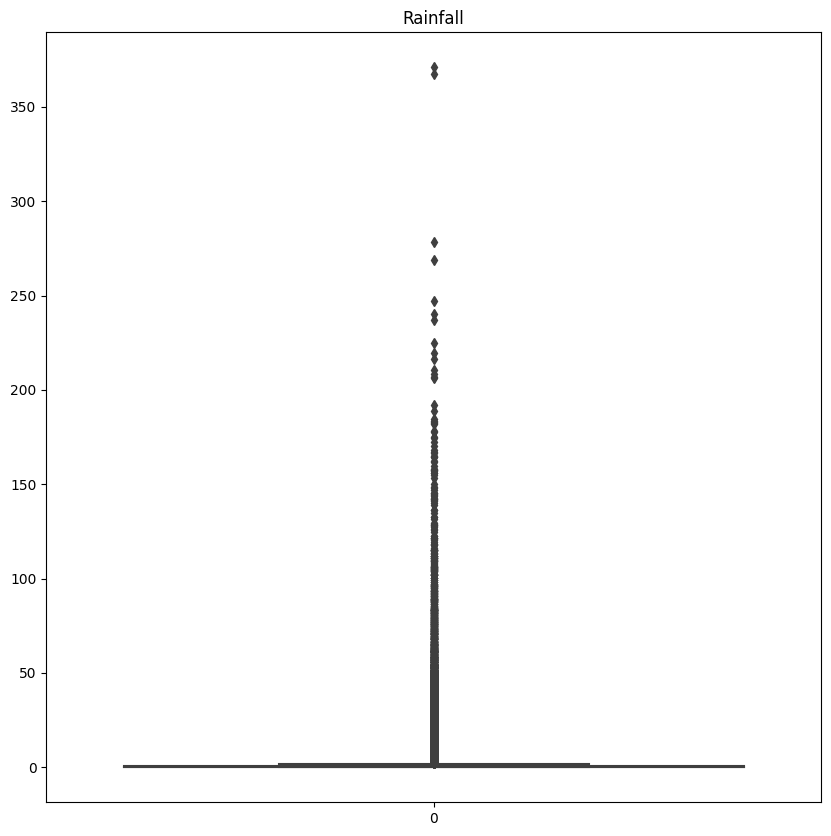

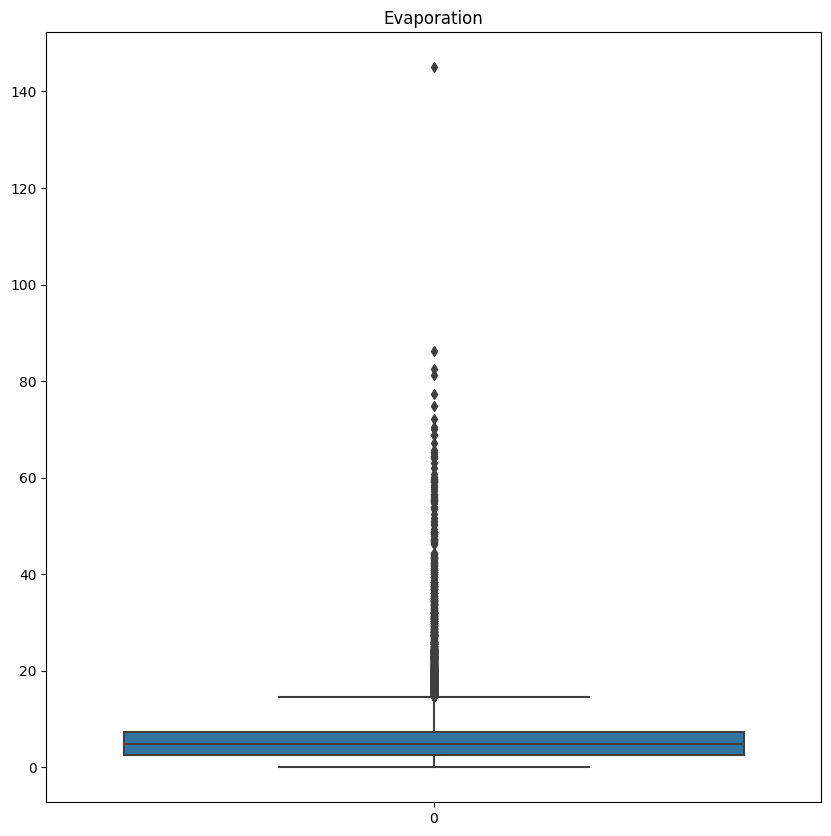

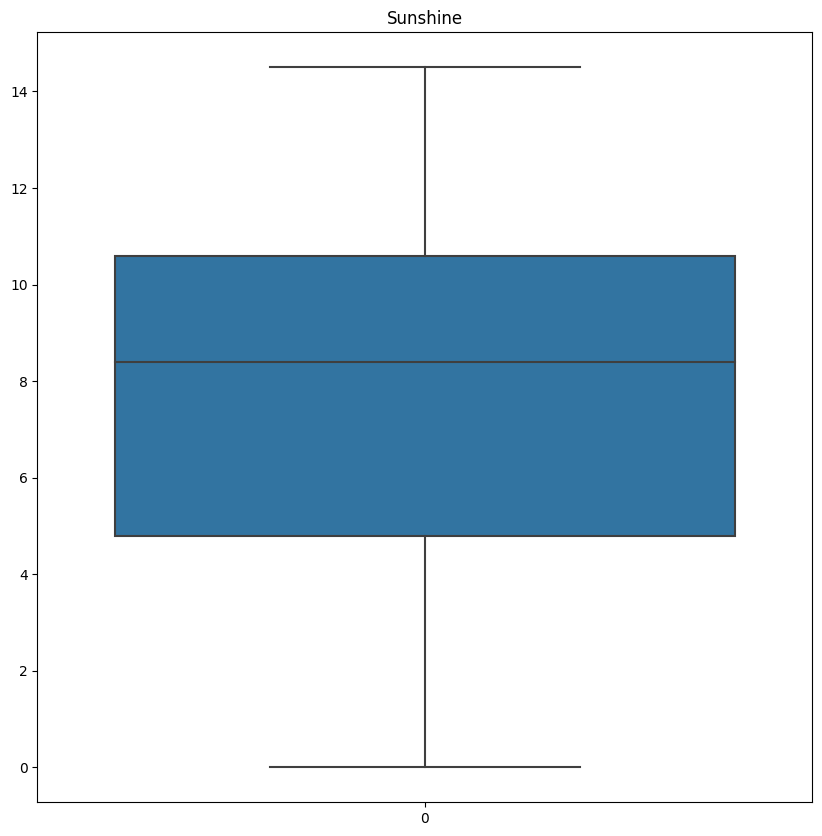

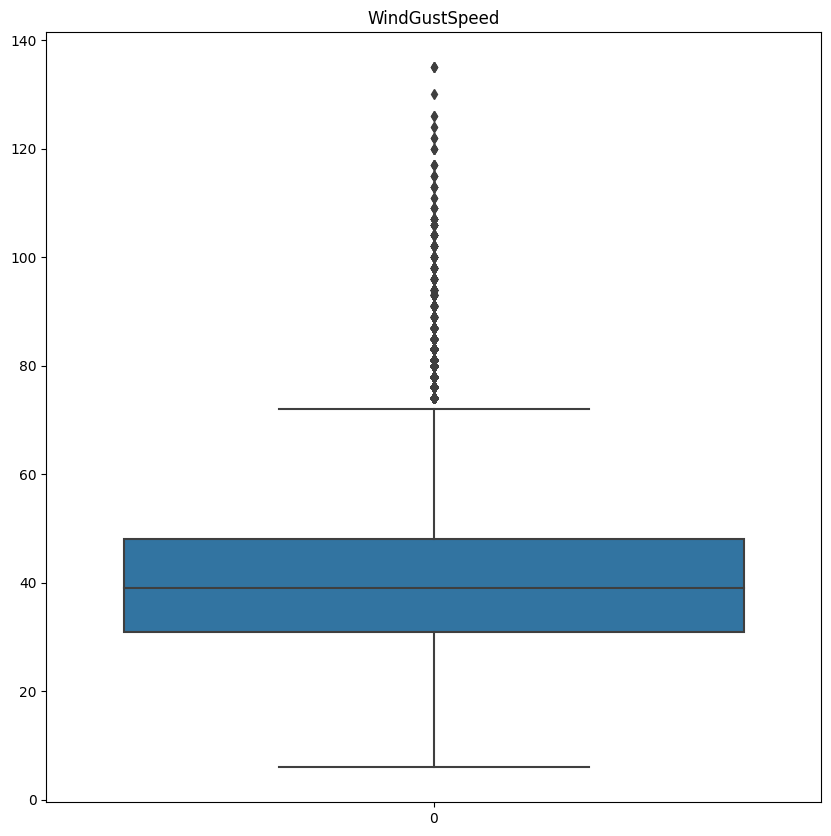

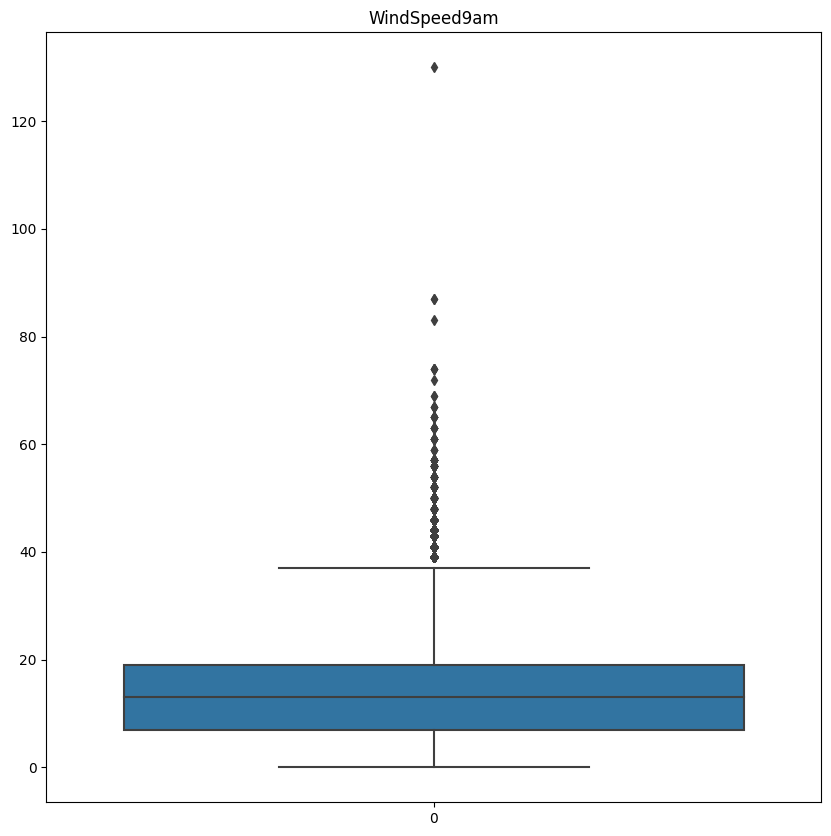

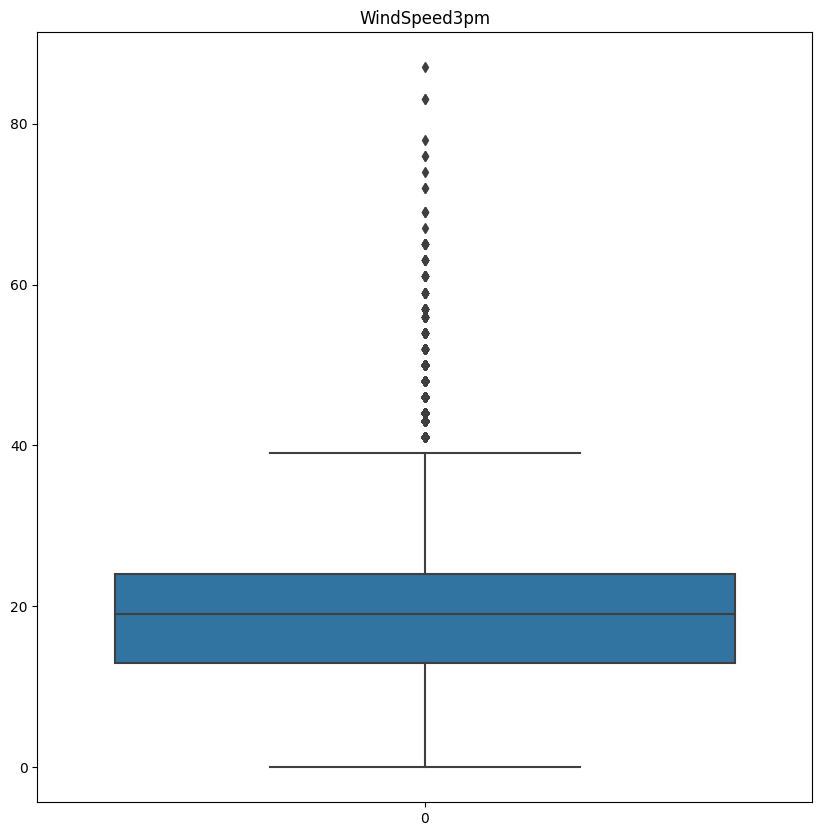

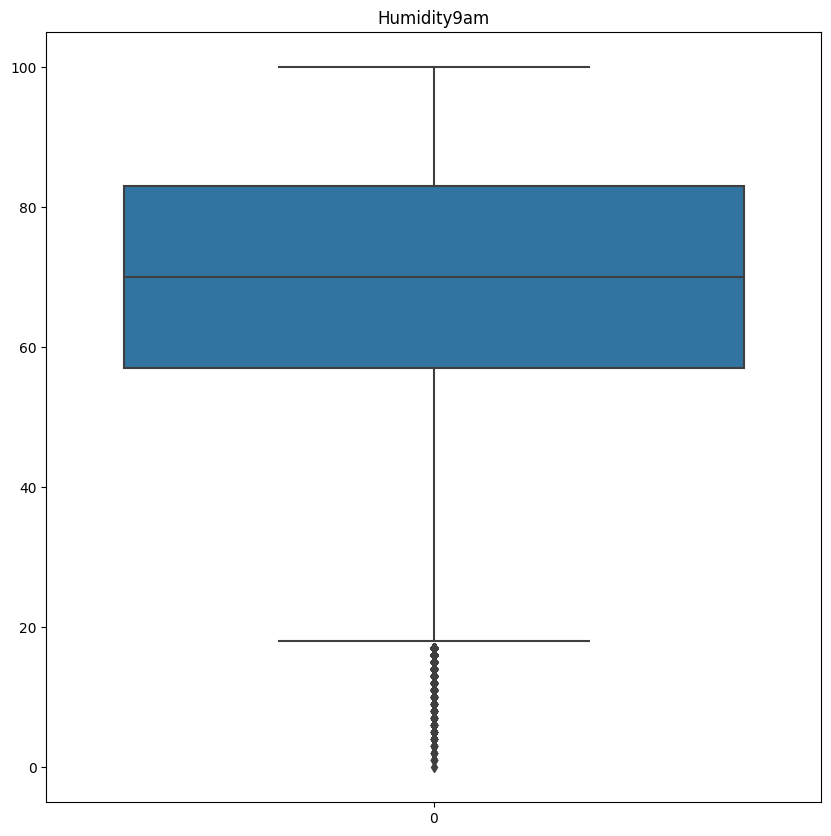

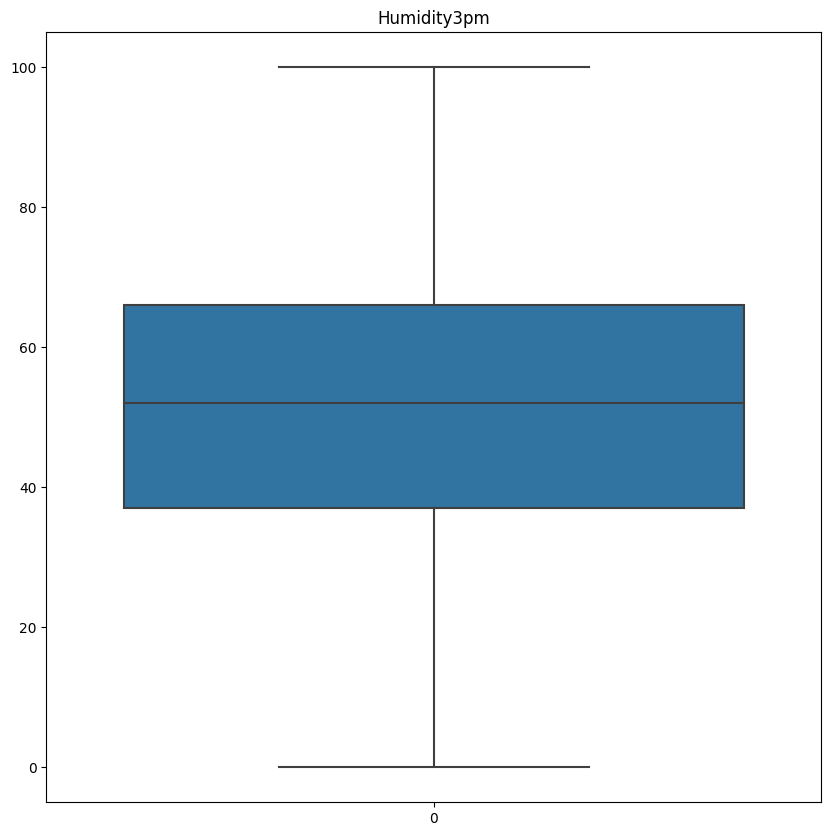

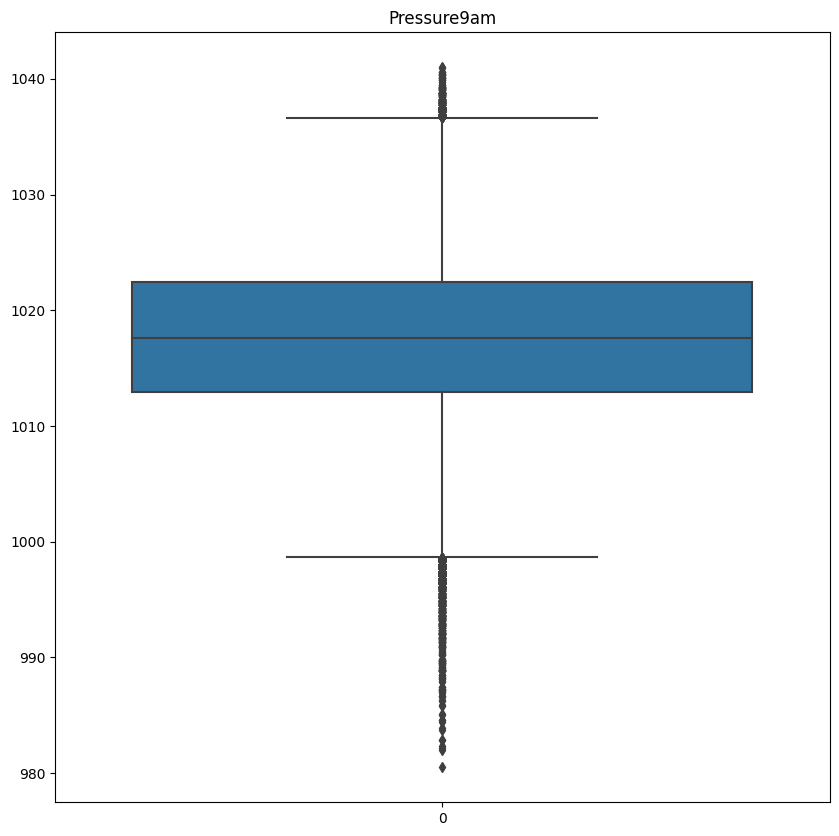

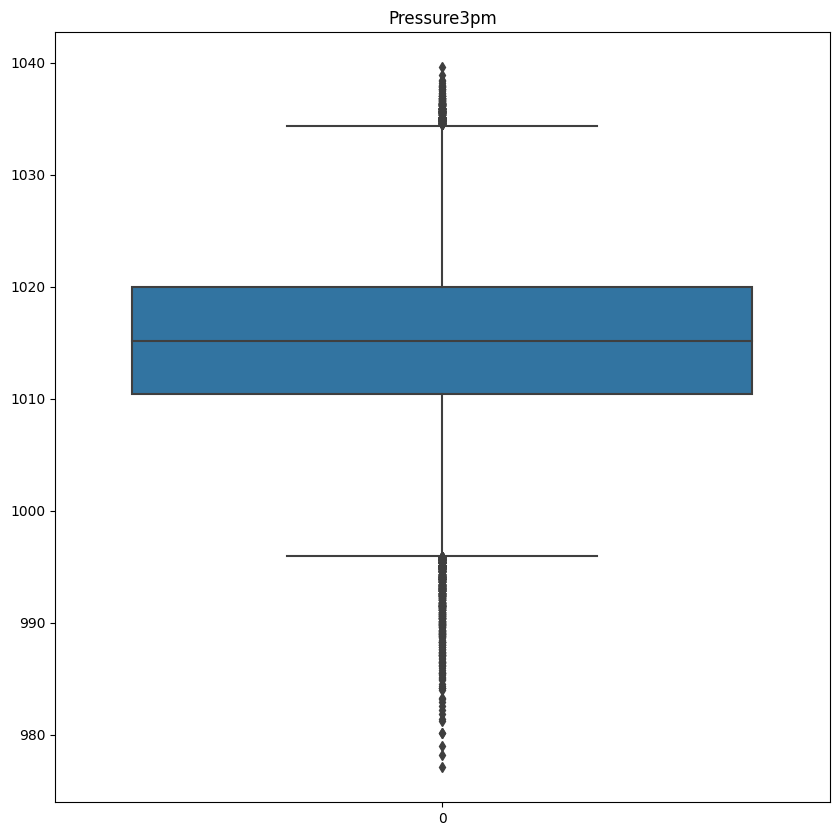

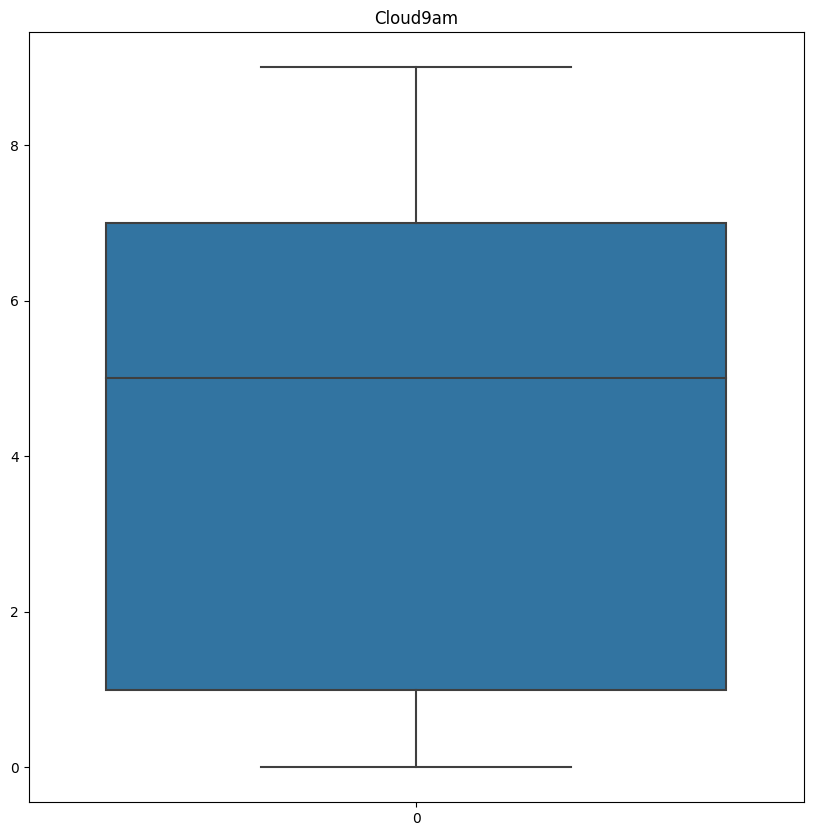

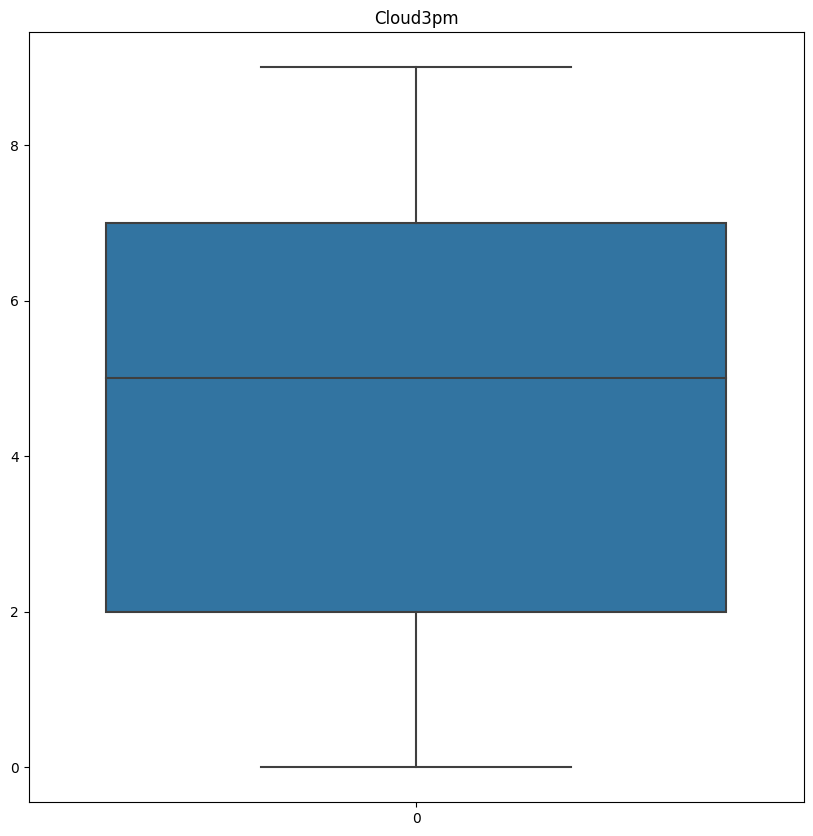

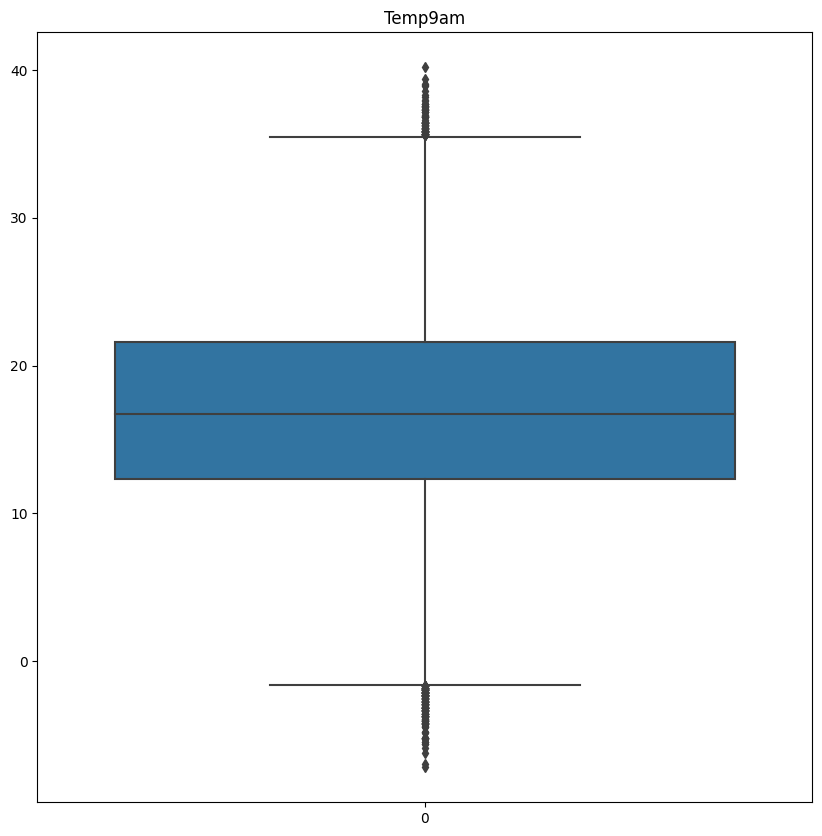

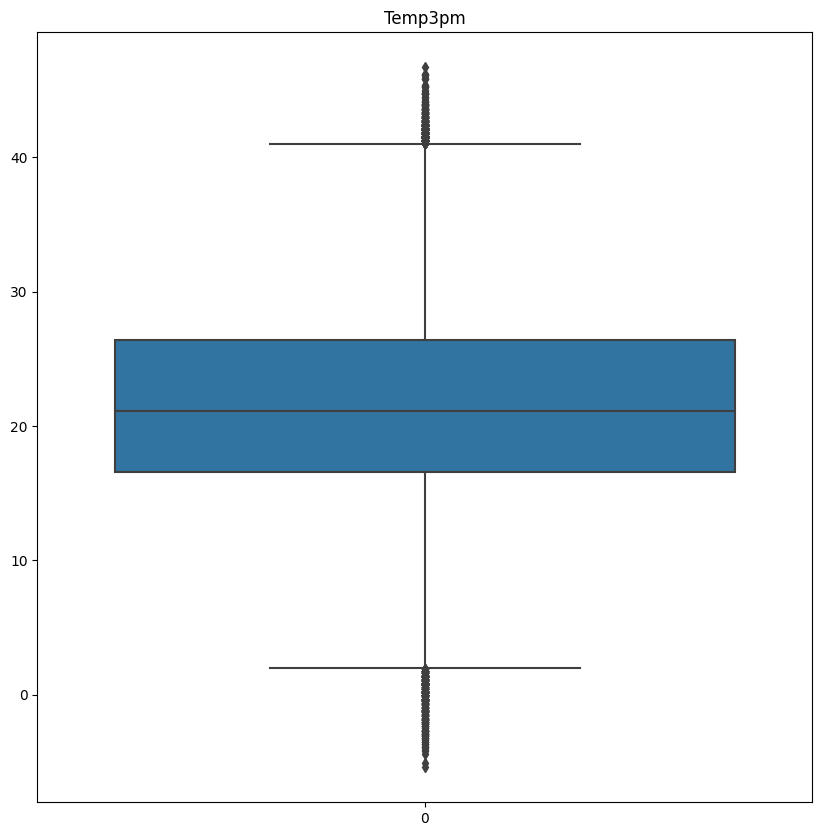

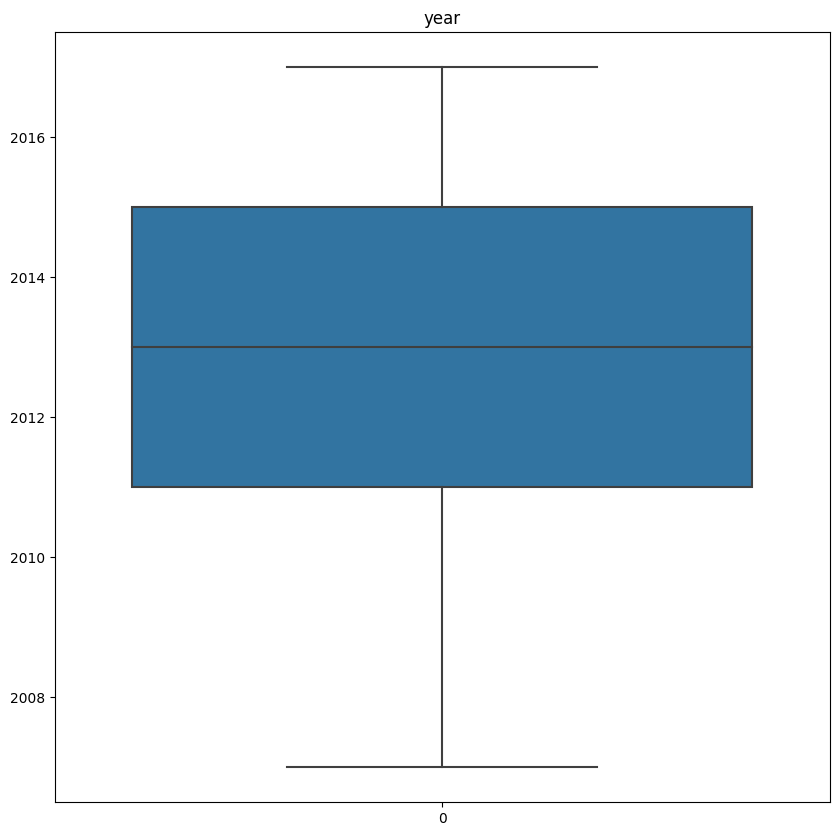

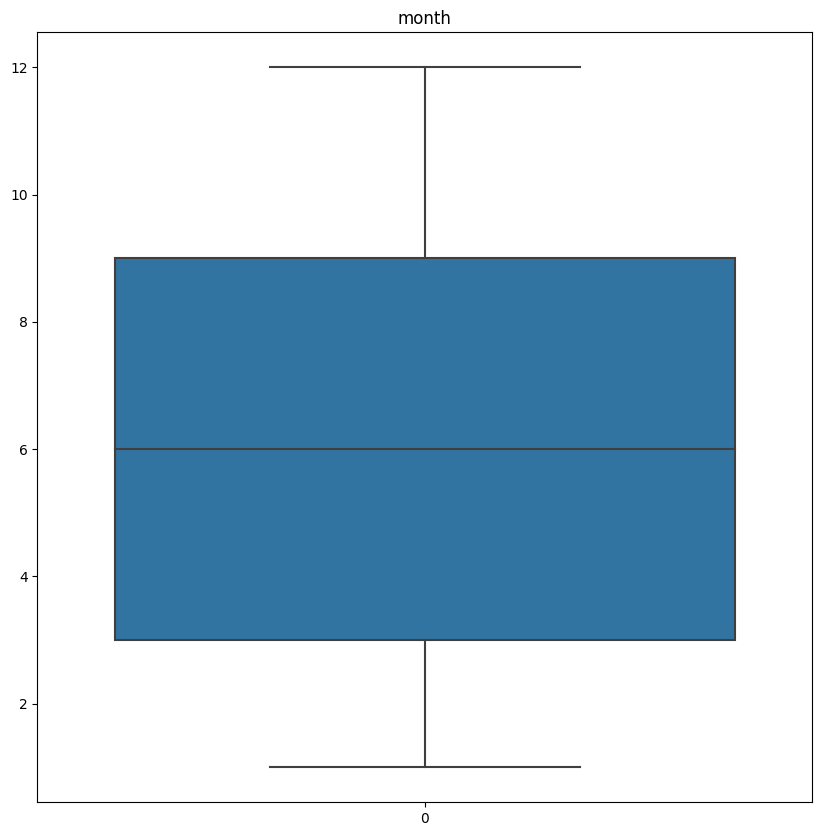

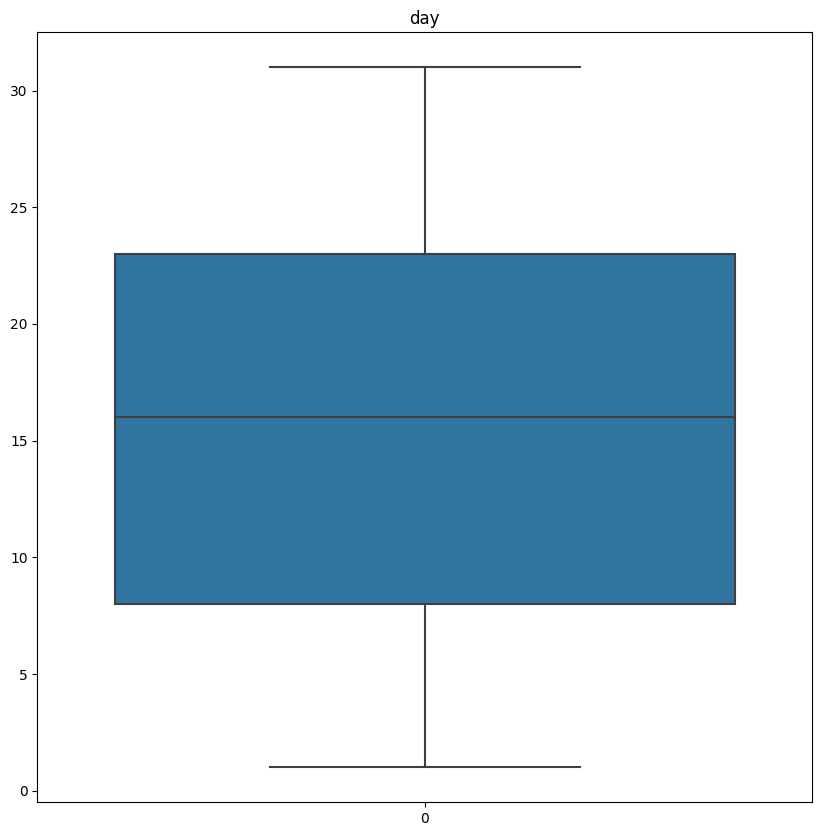

In [26]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)
    

In [27]:
# checking for outliers using the statistical formulas:
rain[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


#### Outlier Treatment to remove outliers from Numerical Features

In [28]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [29]:
# Replacing outliers using IQR:
for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

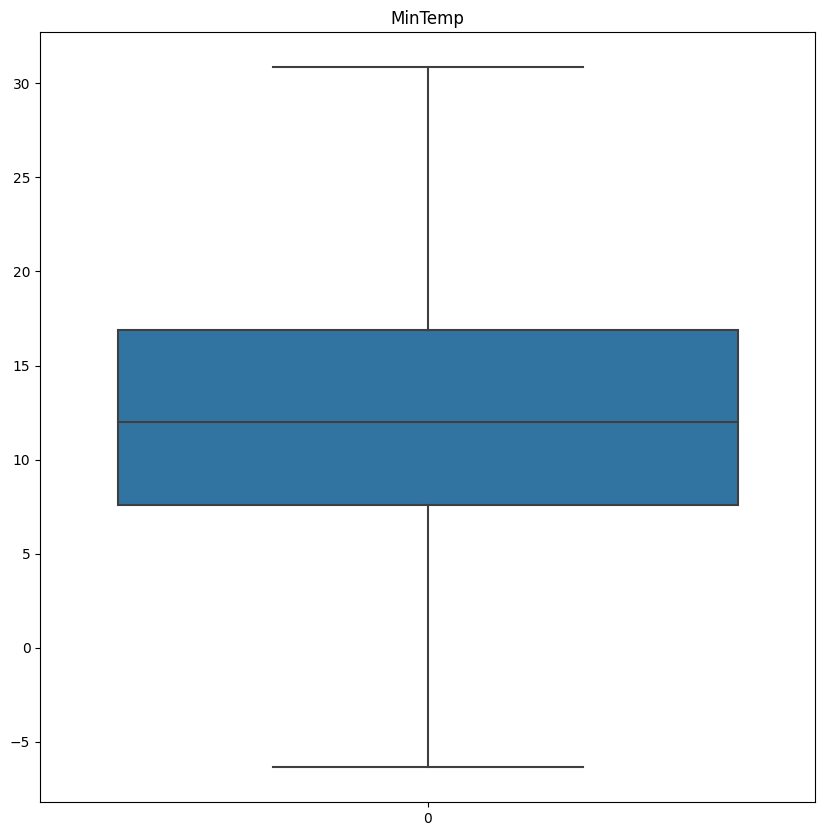

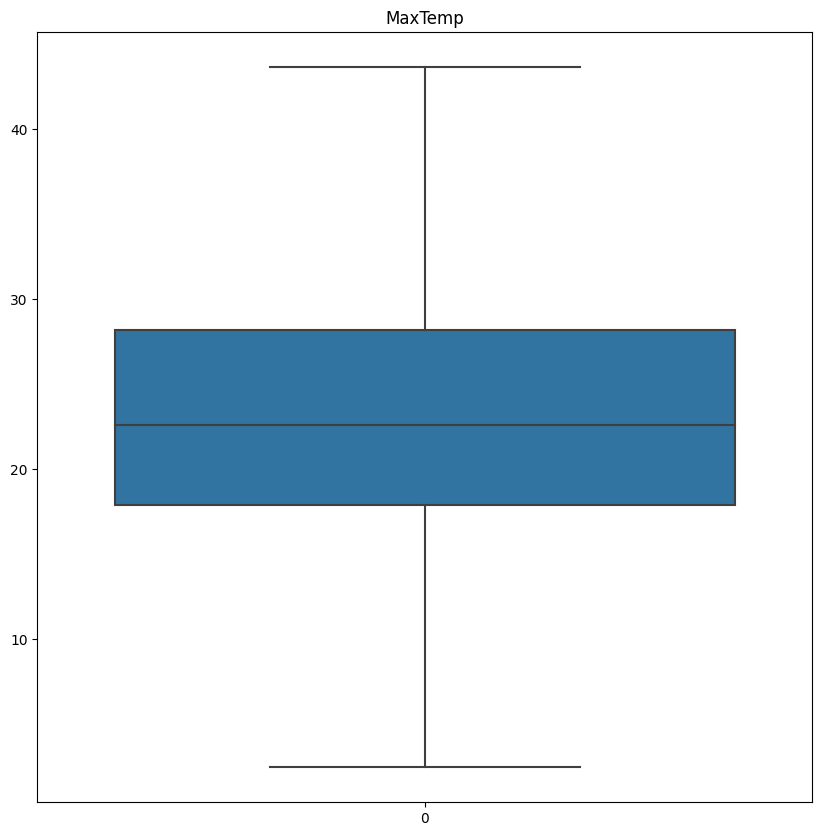

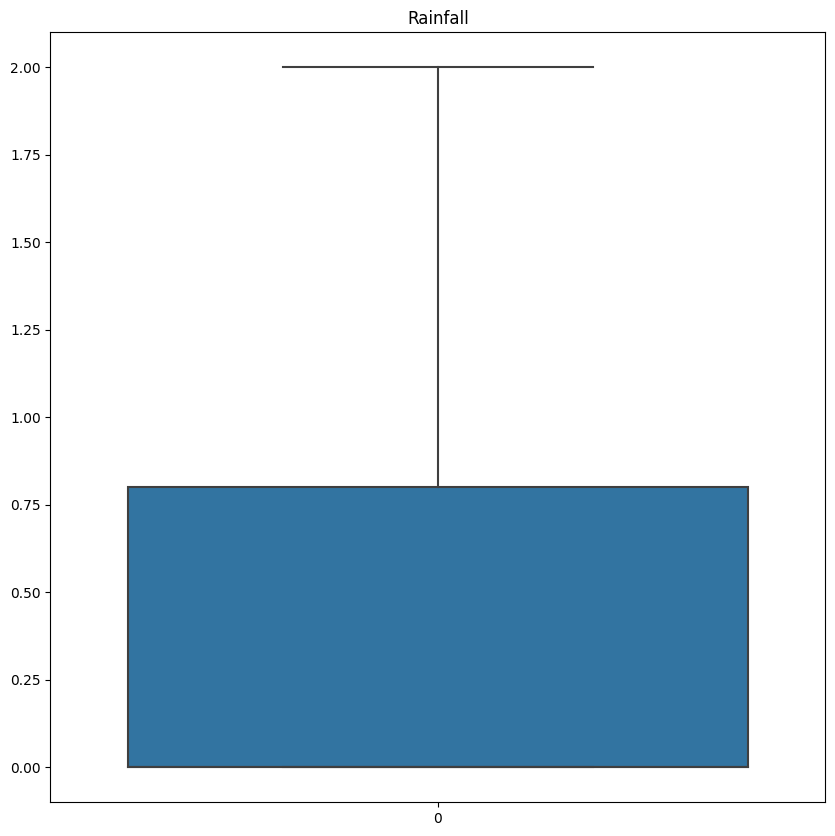

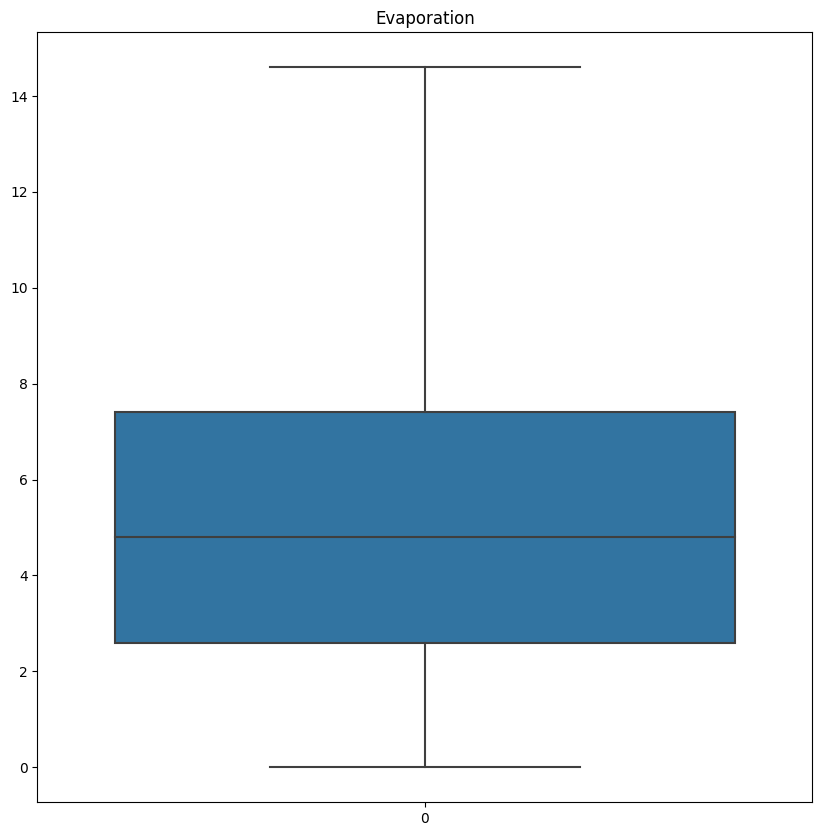

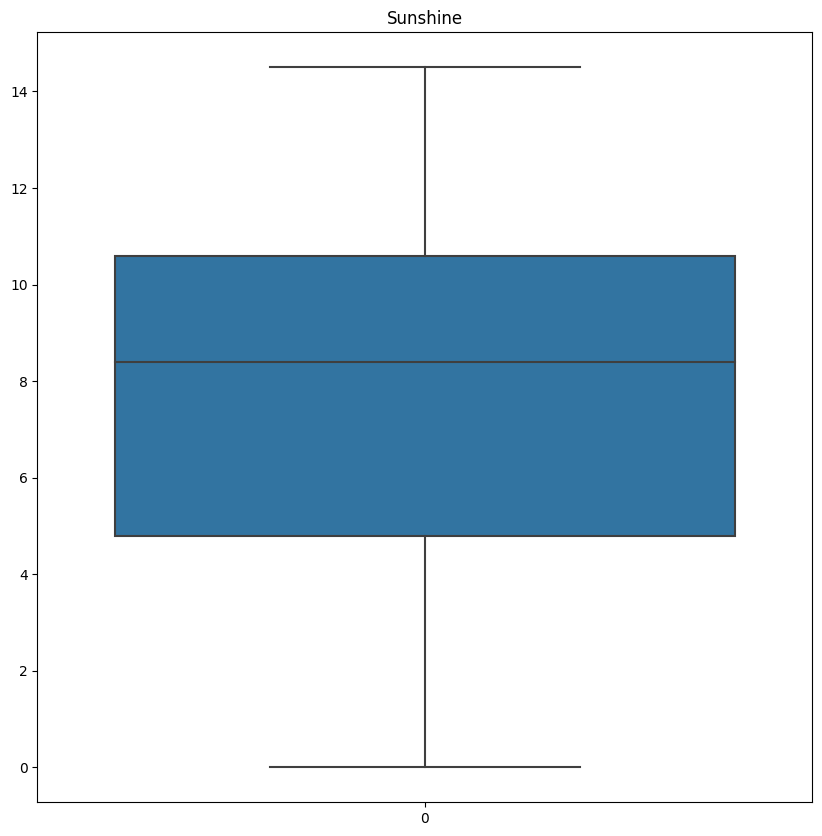

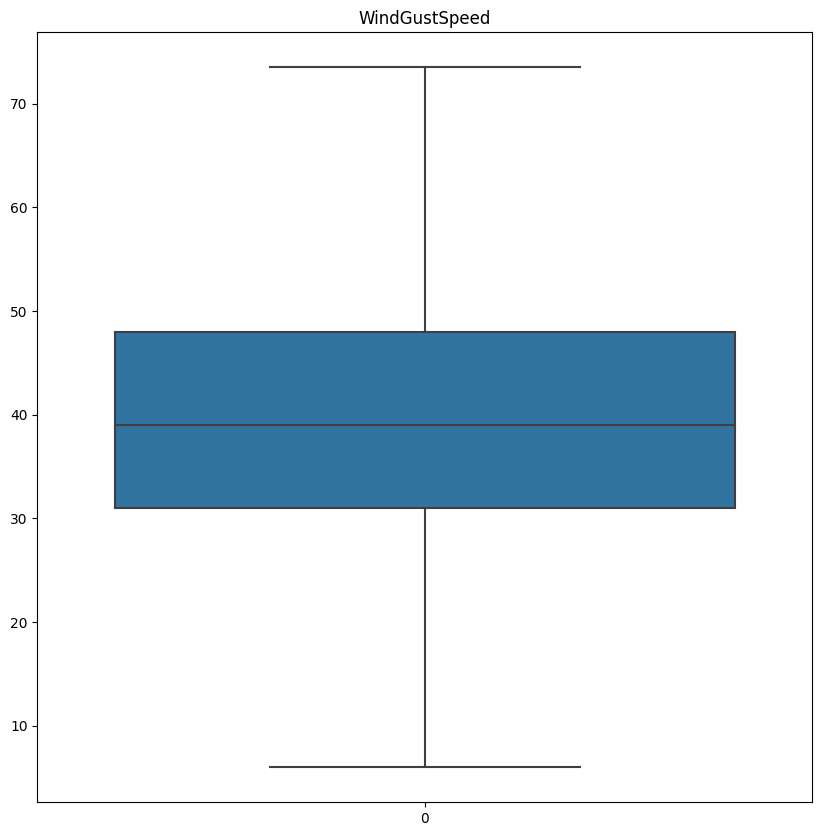

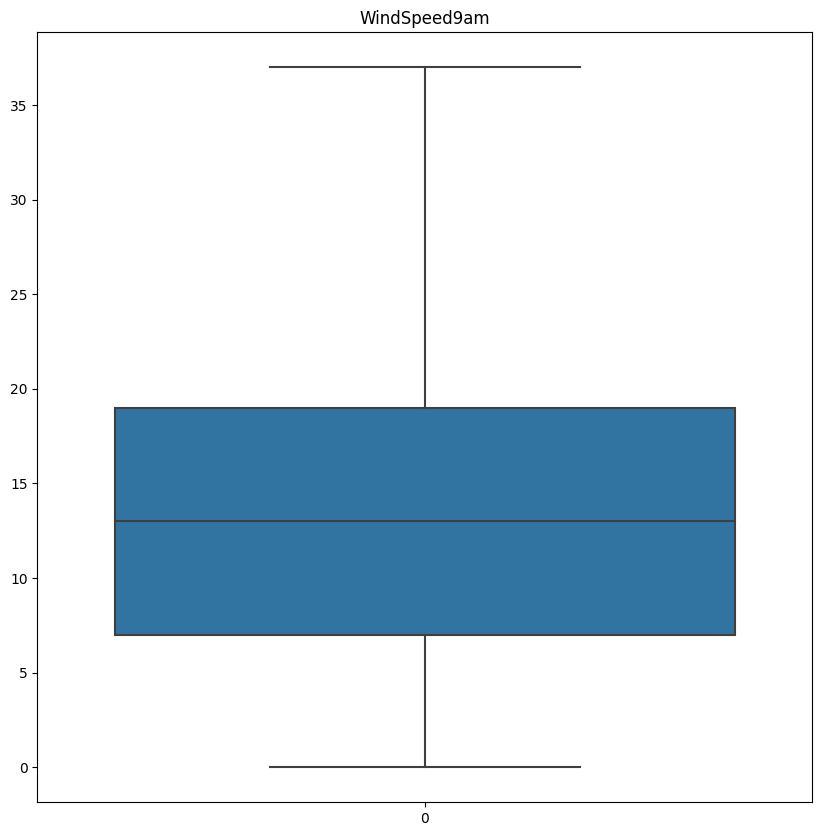

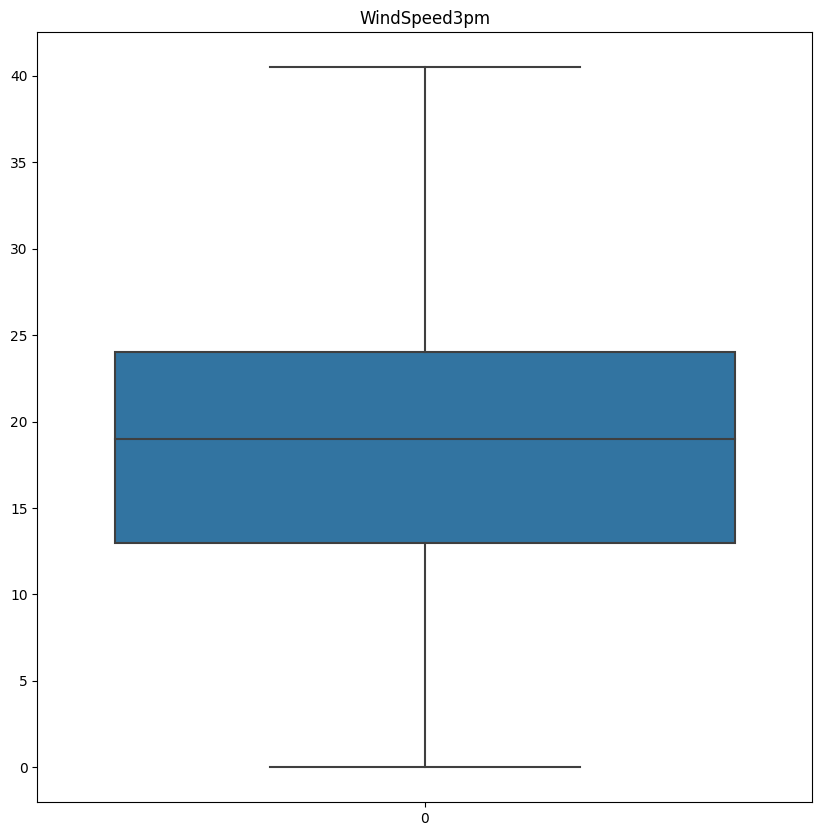

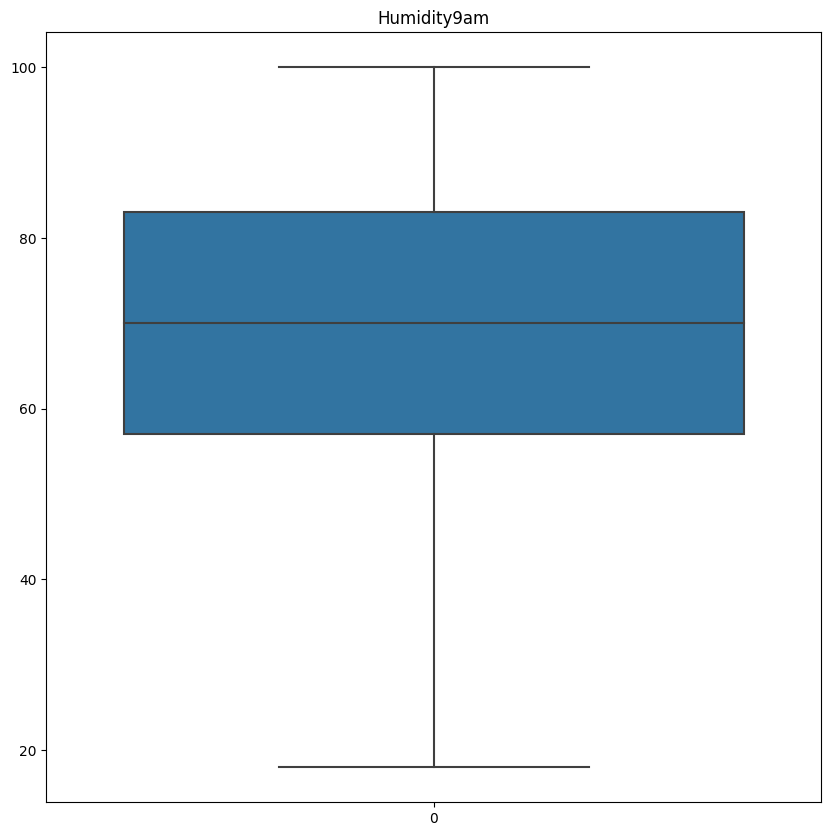

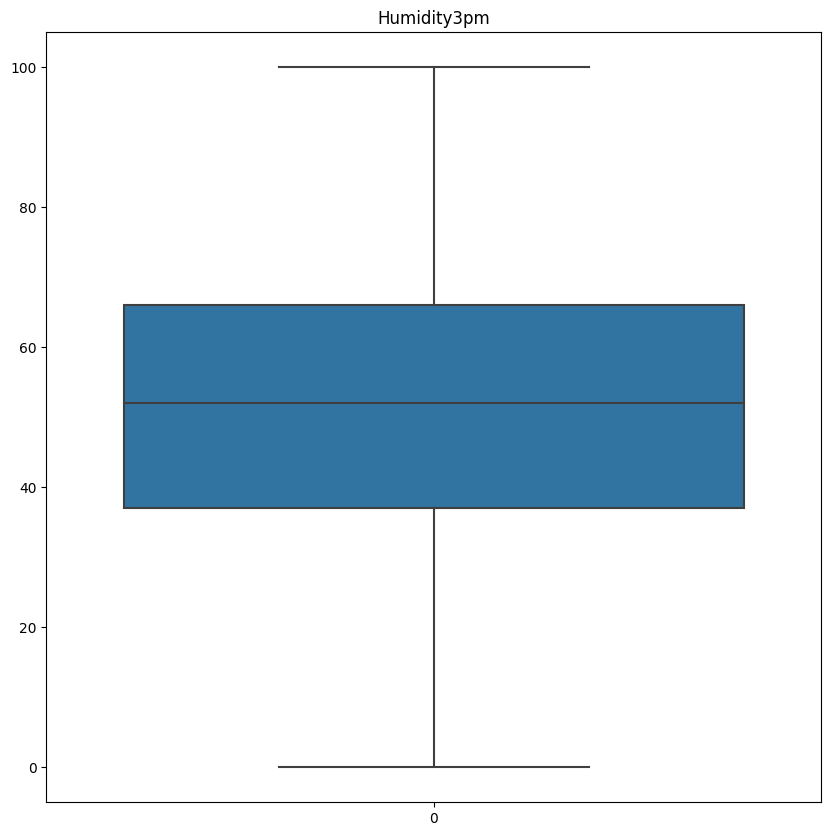

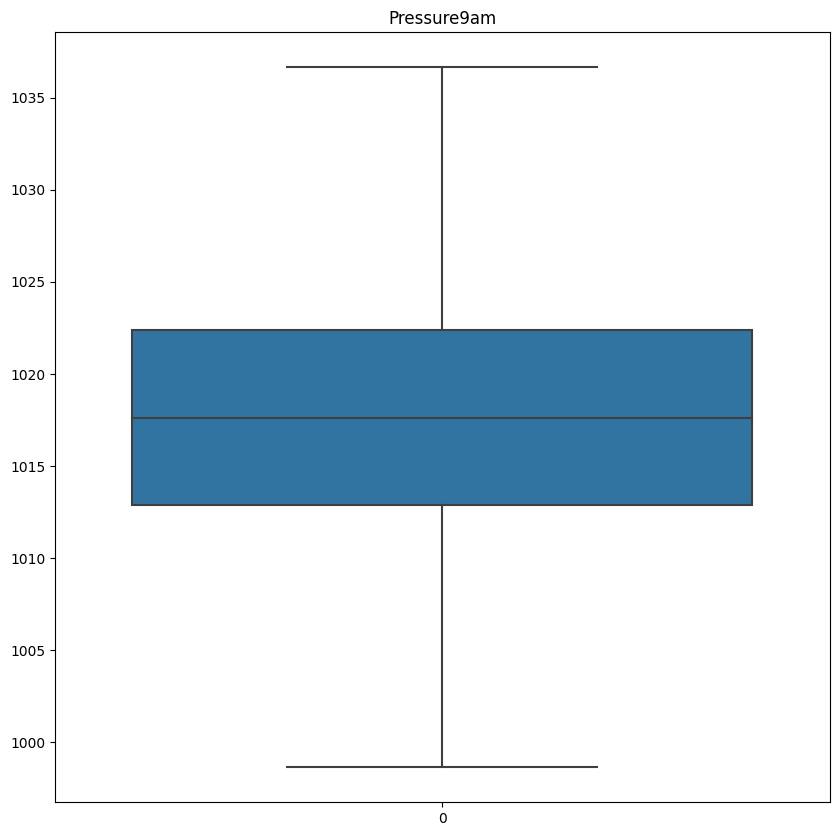

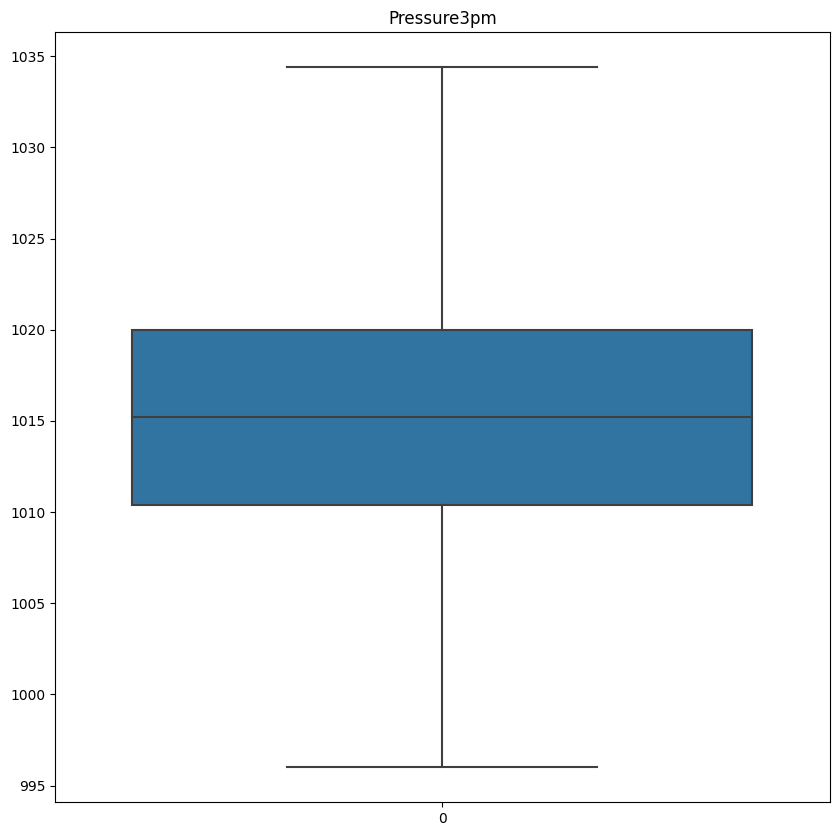

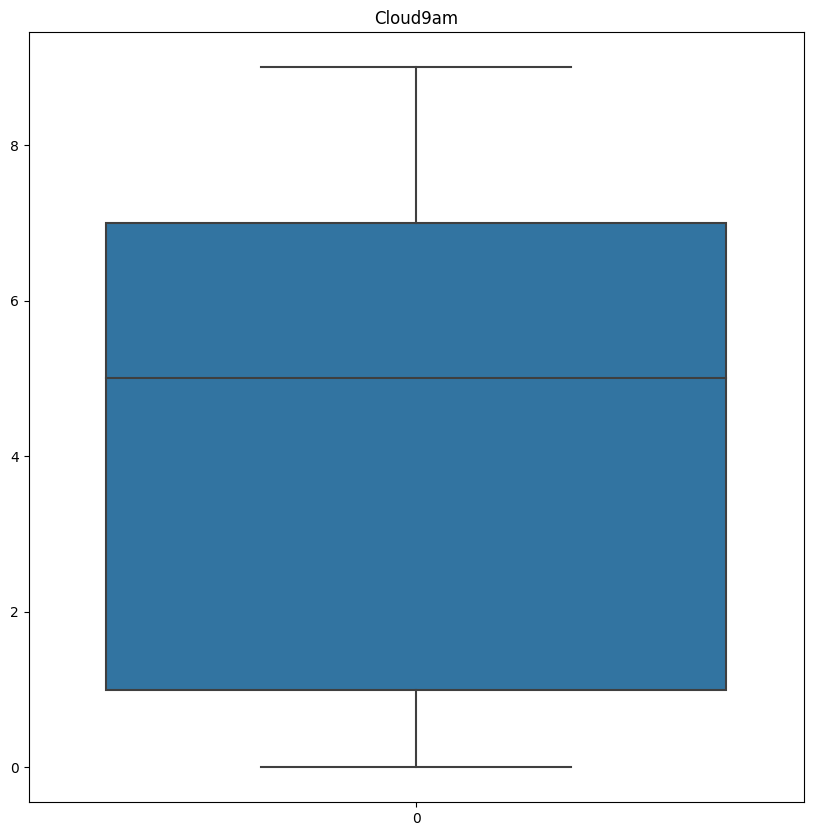

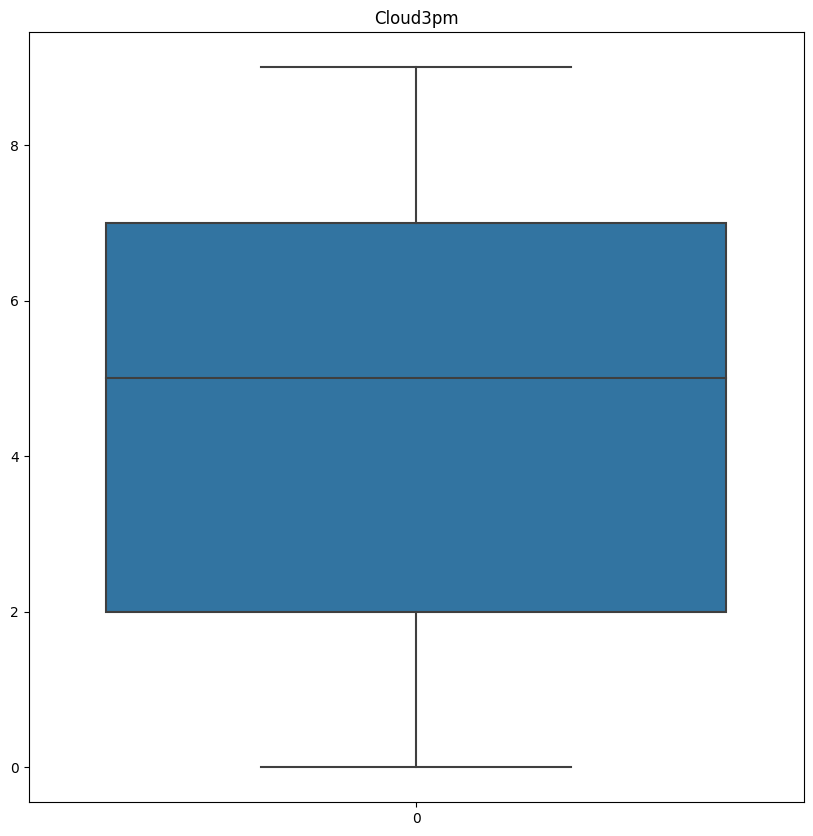

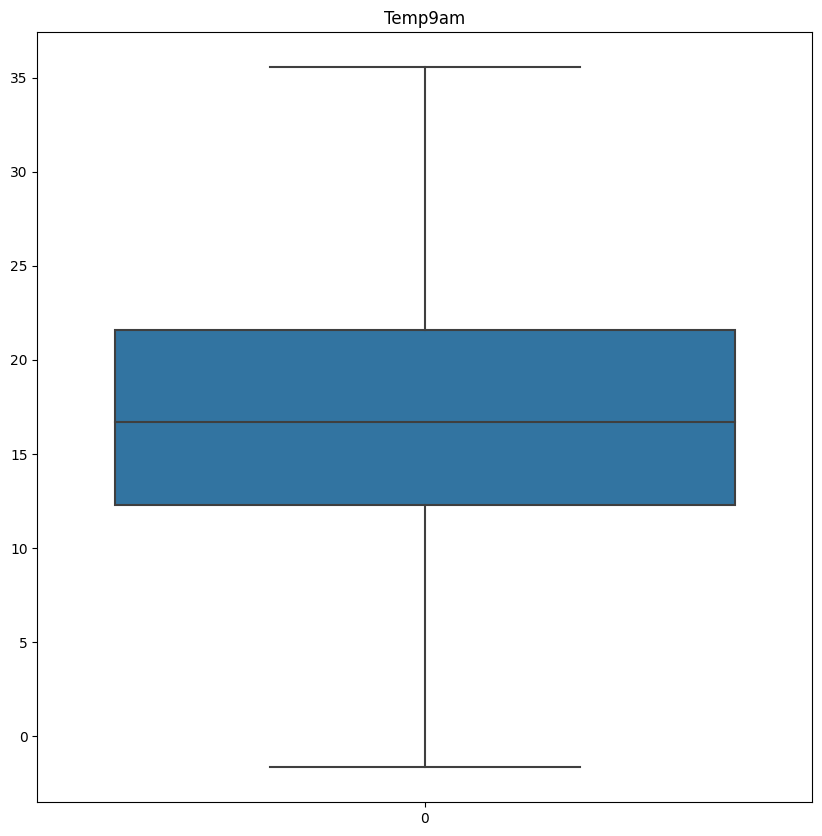

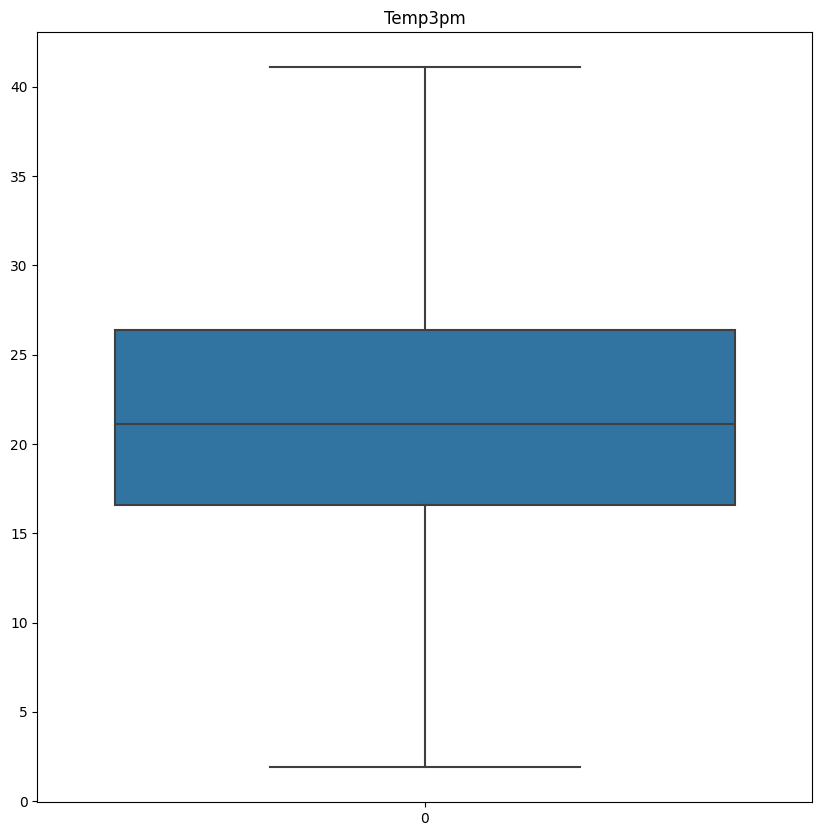

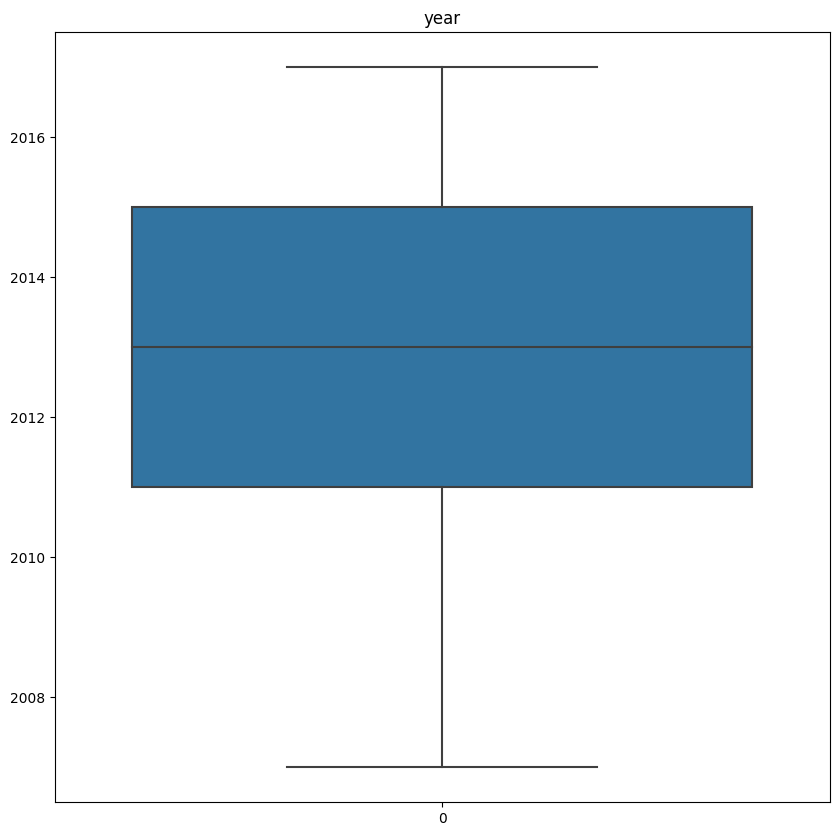

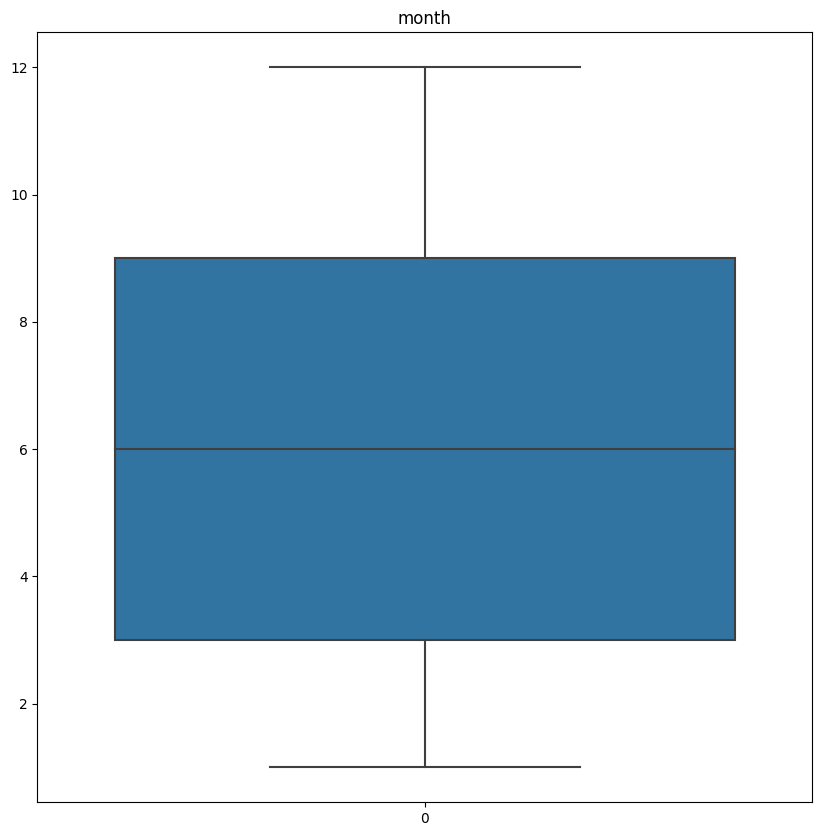

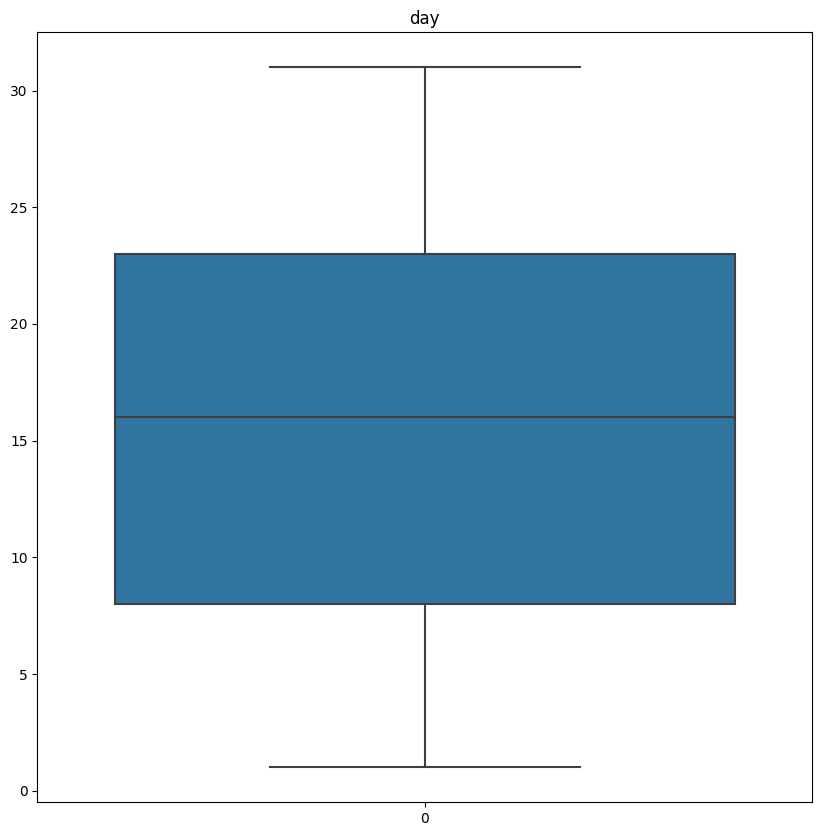

In [30]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)

#### Imputing null values in numerical features using mean

In [31]:
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

#### filling null values using mean

In [32]:
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [33]:
rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [34]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


## univariate analysis

Text(0.5, 1.0, 'rain tomorrow')

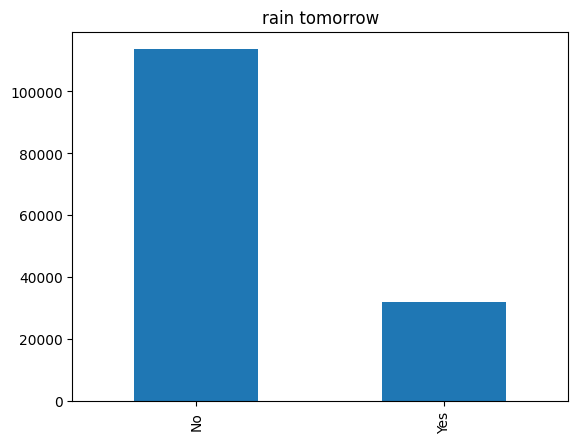

In [37]:
rain['RainTomorrow'].value_counts().plot(kind='bar').set_title('rain tomorrow')

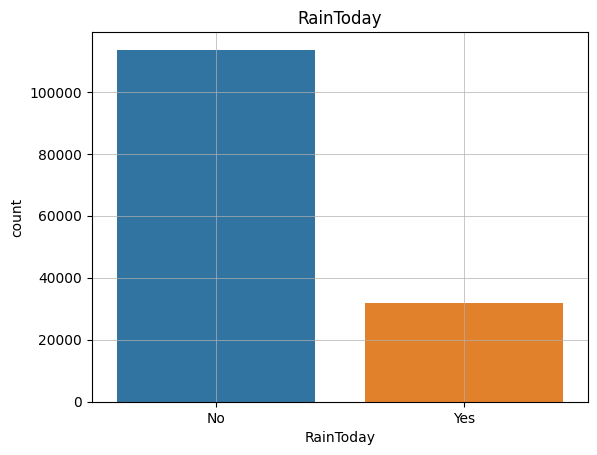

In [39]:
sns.countplot(data=rain, x="RainToday").set_title('RainToday')
plt.grid(linewidth = 0.5)
plt.show()

## multivariate analysis

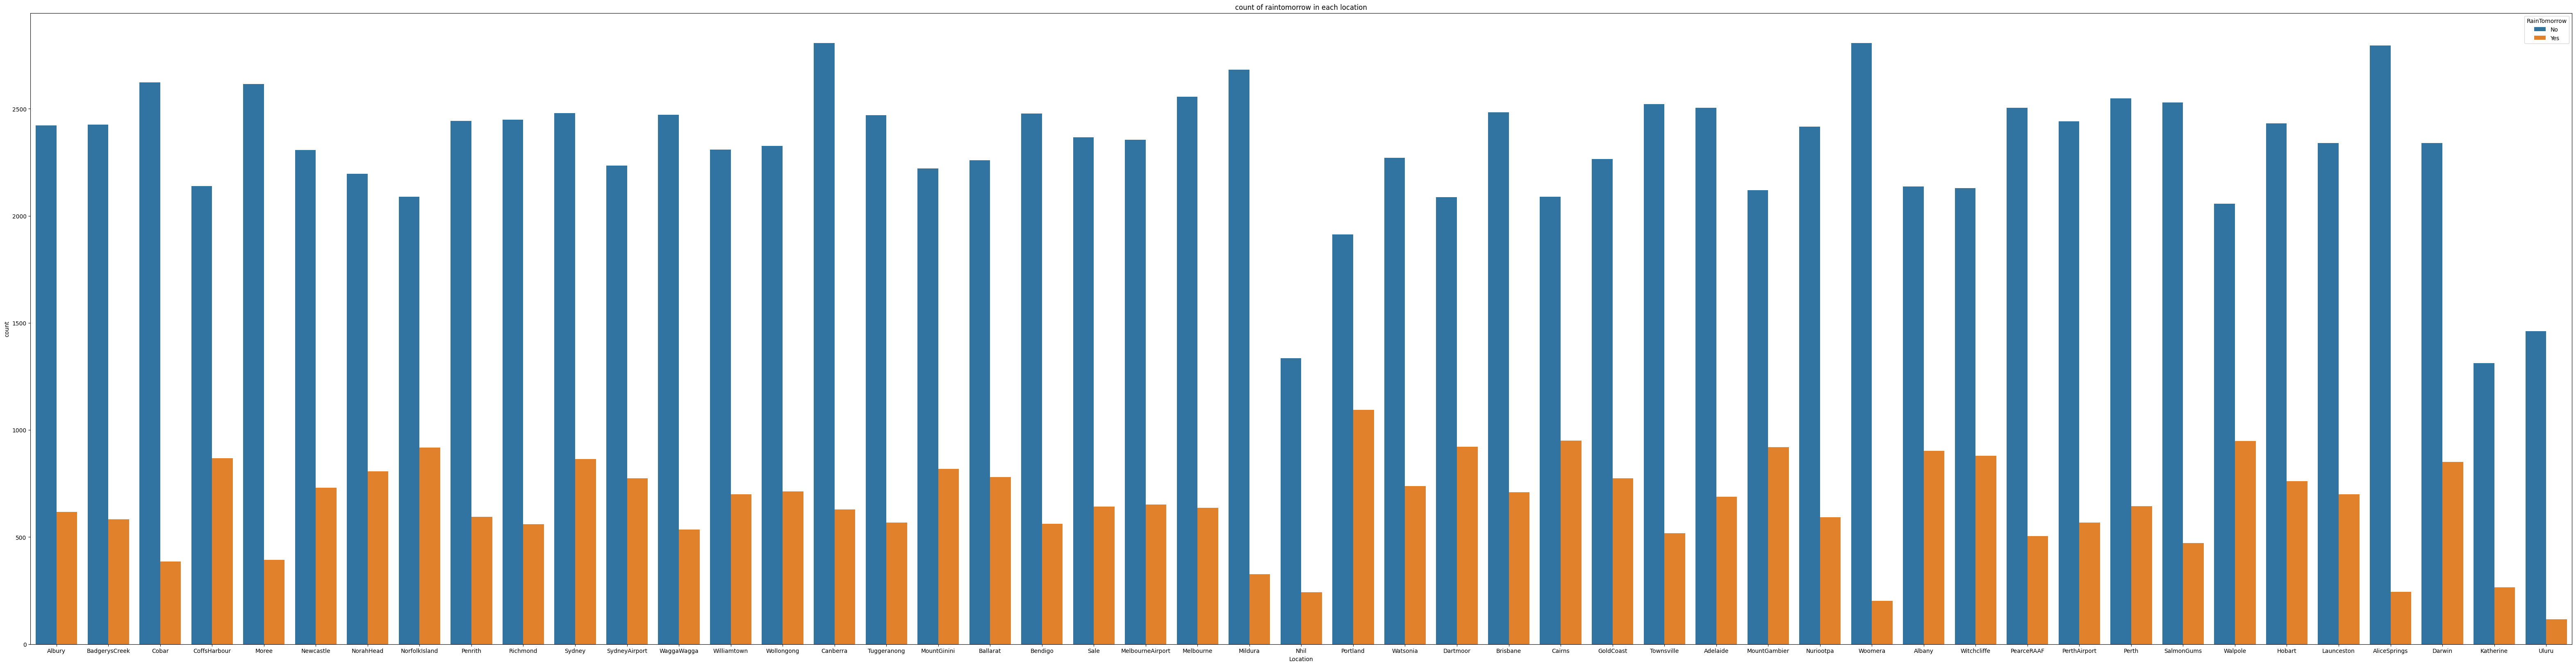

In [44]:
plt.figure(figsize=(80,20))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain).set_title("count of raintomorrow in each location")

Text(0.5, 1.0, 'sunshine vs rainfall')

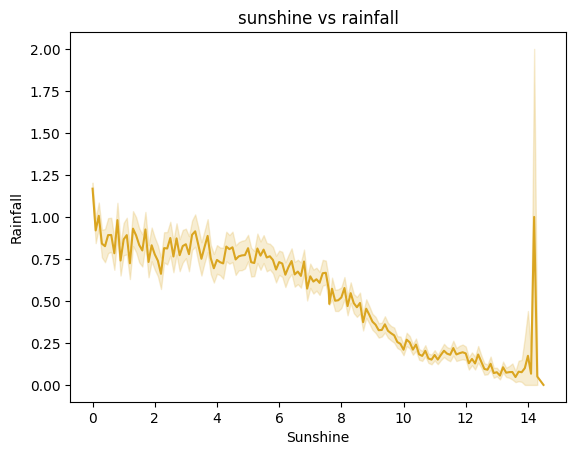

In [45]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='goldenrod').set_title("sunshine vs rainfall")

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

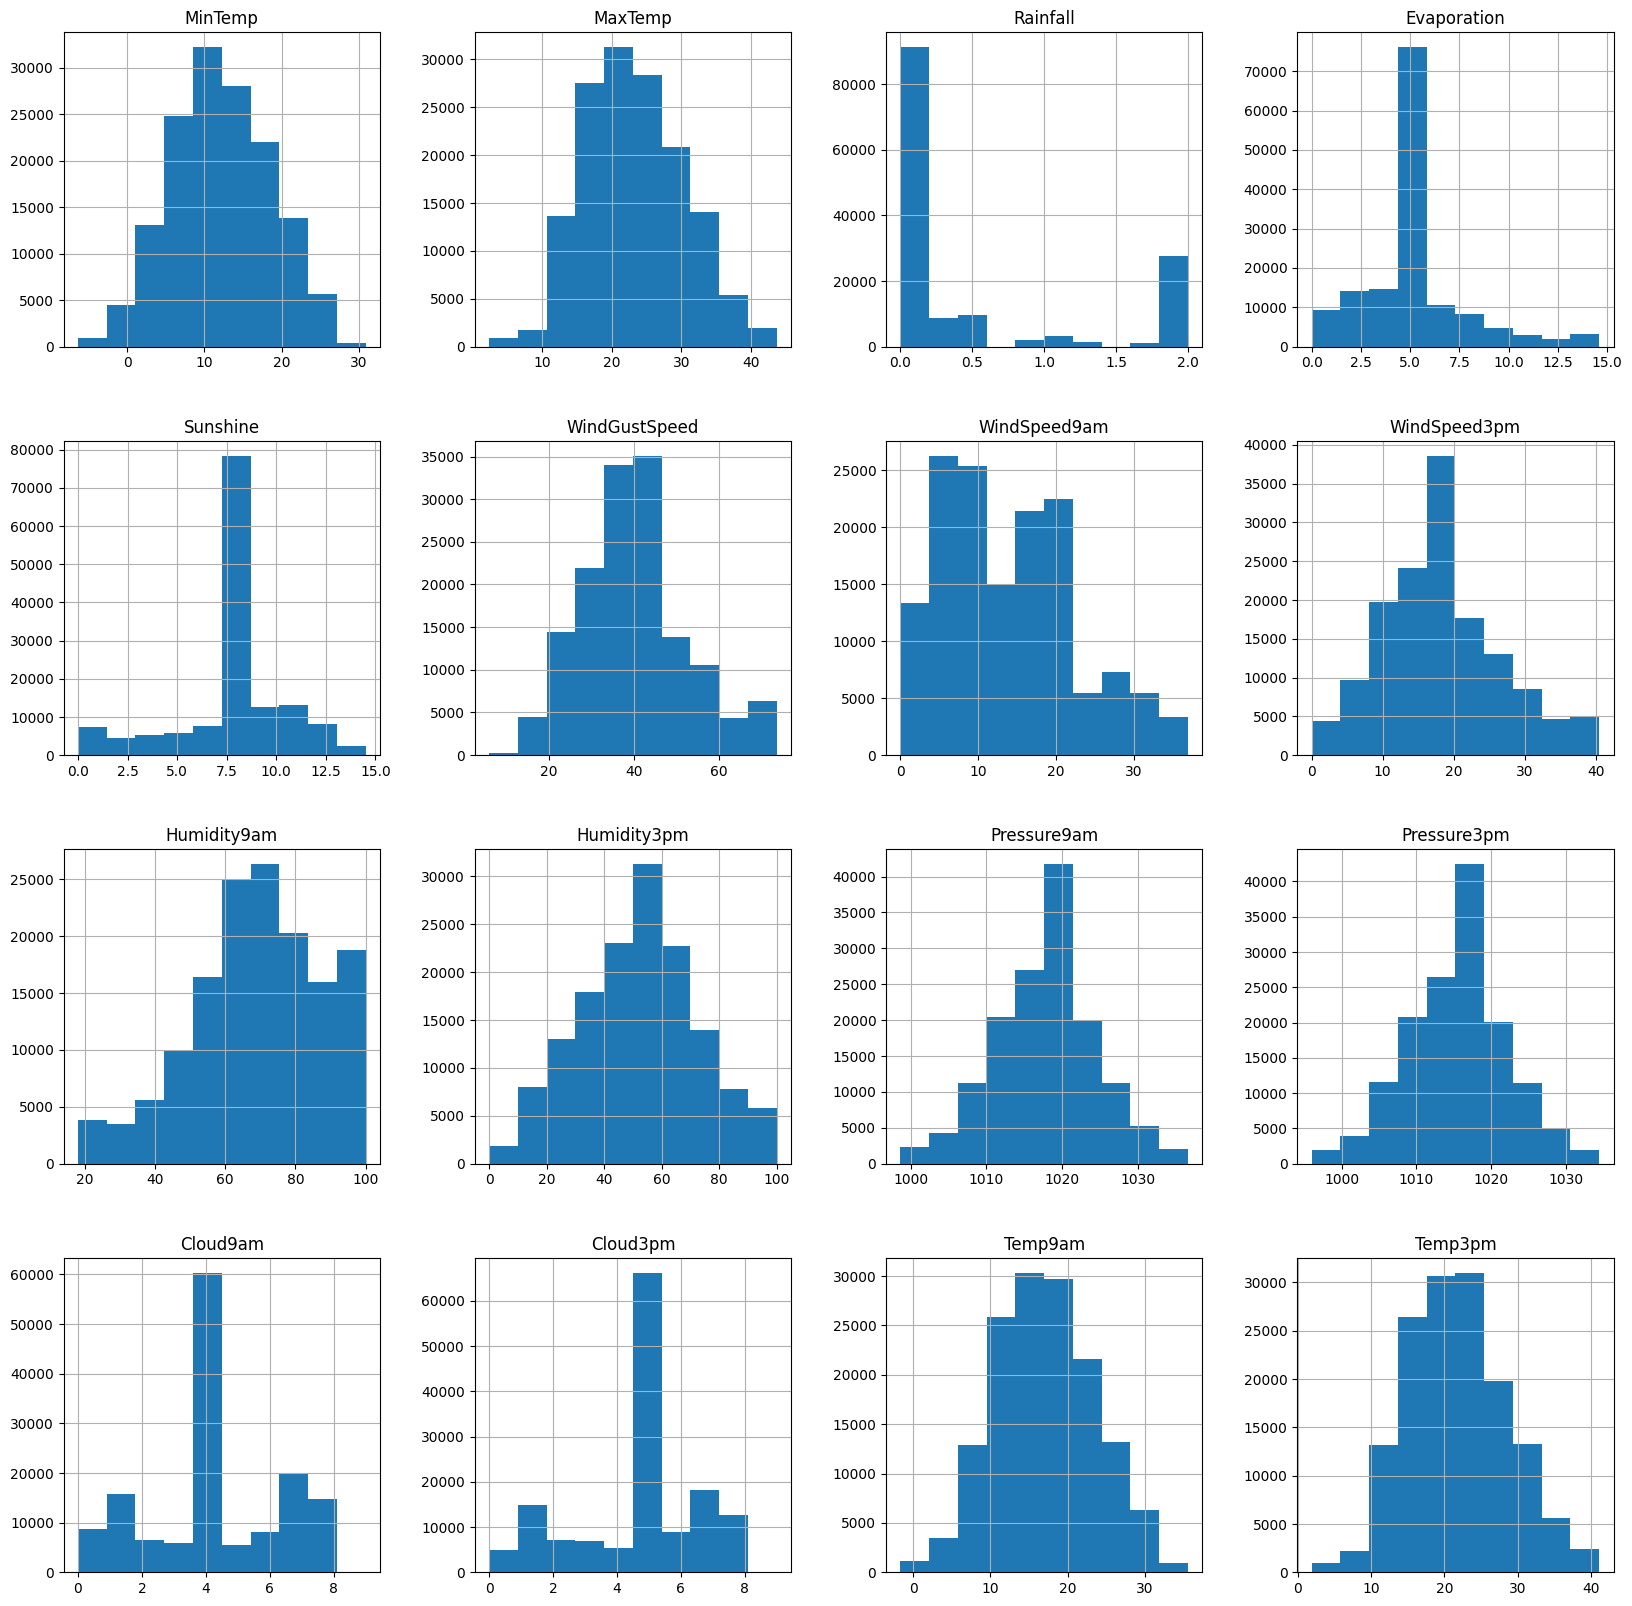

In [47]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

#### correlation

In [48]:
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.733392,0.051203,0.404632,0.051295,0.180336,0.177534,0.177176,-0.230718,0.006033,-0.428982,-0.437161,0.062154,0.016724,0.897765,0.699147,0.043007,-0.202744,0.002342
MaxTemp,0.733392,1.000000,-0.255978,0.501465,0.329668,0.073229,0.017140,0.053117,-0.497111,-0.498544,-0.314920,-0.402168,-0.225781,-0.213214,0.879365,0.968905,0.061734,-0.163190,0.000655
Rainfall,0.051203,-0.255978,1.000000,-0.188968,-0.261889,0.151293,0.102499,0.080050,0.387454,0.406205,-0.179751,-0.095155,0.270881,0.234198,-0.114011,-0.260283,-0.014480,0.011964,0.003290
Evaporation,0.404632,0.501465,-0.188968,1.000000,0.339024,0.170903,0.157072,0.113275,-0.421244,-0.318548,-0.248039,-0.269624,-0.168963,-0.167229,0.477917,0.485623,0.060169,-0.024221,-0.005429
Sunshine,0.051295,0.329668,-0.261889,0.339024,1.000000,-0.019597,0.006782,0.041356,-0.349320,-0.443121,0.029821,-0.016637,-0.532497,-0.553853,0.208714,0.347710,0.006072,0.017589,-0.000286
WindGustSpeed,0.180336,0.073229,0.151293,0.170903,-0.019597,1.000000,0.578562,0.659350,-0.214349,-0.028868,-0.424191,-0.381720,0.050920,0.078253,0.154054,0.039421,-0.029014,0.058281,-0.009631
WindSpeed9am,0.177534,0.017140,0.102499,0.157072,0.006782,0.578562,1.000000,0.507874,-0.273399,-0.033036,-0.214427,-0.164884,0.018119,0.039635,0.131738,0.007197,-0.017855,0.051481,-0.008879
WindSpeed3pm,0.177176,0.053117,0.080050,0.113275,0.041356,0.659350,0.507874,1.000000,-0.146602,0.015137,-0.276327,-0.237763,0.041044,0.018156,0.165858,0.031299,-0.029658,0.058906,-0.010331
Humidity9am,-0.230718,-0.497111,0.387454,-0.421244,-0.349320,-0.214349,-0.273399,-0.146602,1.000000,0.658850,0.133181,0.177319,0.354042,0.273774,-0.468540,-0.489627,0.009745,-0.089070,0.015121
Humidity3pm,0.006033,-0.498544,0.406205,-0.318548,-0.443121,-0.028868,-0.033036,0.015137,0.658850,1.000000,-0.024338,0.050405,0.398762,0.406605,-0.216576,-0.555212,-0.009463,-0.018568,0.012813


<AxesSubplot:>

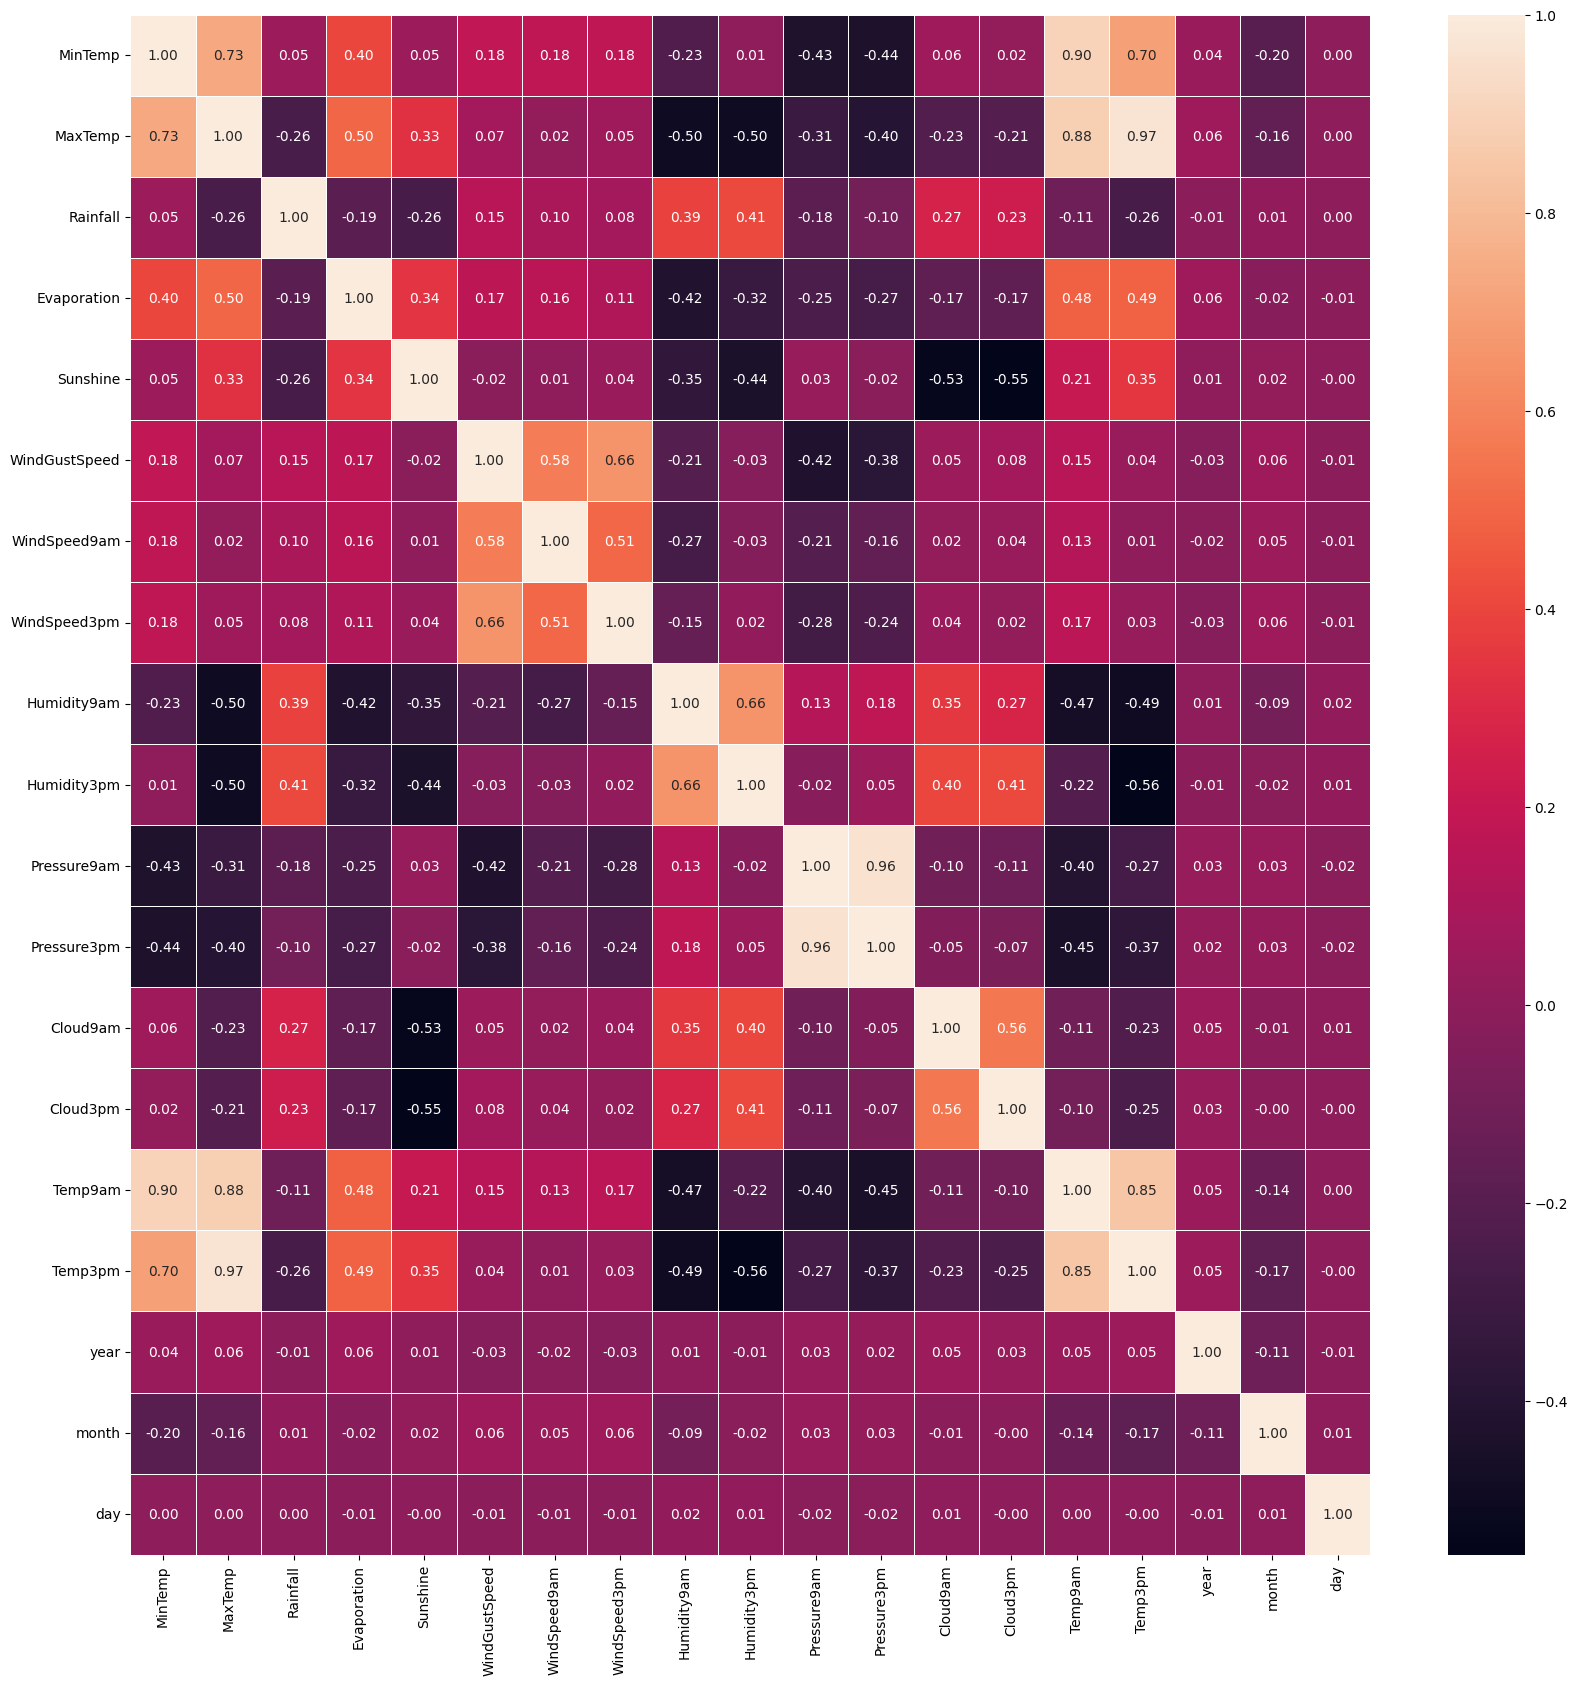

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [50]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


#### feature encoding

In [51]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [52]:
# Encoding Categorical Features using replace function:
rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
# pd.get_dummies(rain['RainToday'],drop_first = True)
rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [53]:
def encode_data(feature_name):
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict


In [54]:
rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [55]:
rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [56]:
rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [57]:
rain['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [58]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


#### splitting features into independent and dependent features

In [59]:
X = rain.drop(['RainTomorrow'],axis=1)
y = rain['RainTomorrow']

#### feature importance

In [60]:
# finding feature importance using ExtraTreesRegressor:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [61]:
etr_model.feature_importances_

array([0.03450185, 0.03001801, 0.02901825, 0.03816642, 0.02323954,
       0.04403923, 0.03003572, 0.05576983, 0.03038287, 0.03185921,
       0.03090126, 0.03226514, 0.03697026, 0.20169735, 0.03648973,
       0.05061828, 0.02423745, 0.03572183, 0.02807484, 0.02834824,
       0.0537072 , 0.03082129, 0.03053591, 0.03258028])

Text(0.5, 1.0, 'feature importance')

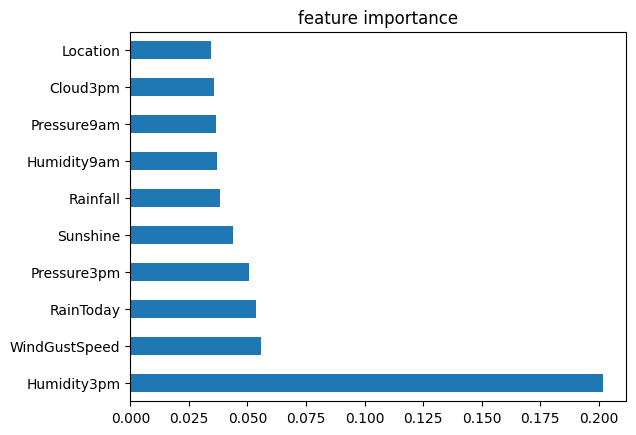

In [62]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh').set_title('feature importance')

In [63]:
feature_imp

Location         0.034502
MinTemp          0.030018
MaxTemp          0.029018
Rainfall         0.038166
Evaporation      0.023240
Sunshine         0.044039
WindGustDir      0.030036
WindGustSpeed    0.055770
WindDir9am       0.030383
WindDir3pm       0.031859
WindSpeed9am     0.030901
WindSpeed3pm     0.032265
Humidity9am      0.036970
Humidity3pm      0.201697
Pressure9am      0.036490
Pressure3pm      0.050618
Cloud9am         0.024237
Cloud3pm         0.035722
Temp9am          0.028075
Temp3pm          0.028348
RainToday        0.053707
year             0.030821
month            0.030536
day              0.032580
dtype: float64

## split into training and testing data

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [65]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


## feature scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [67]:
X_test = scaler.transform(X_test)

#### Save the Scaler object to Standardize Real Time Data feeded by users for prediction

In [68]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## model training using logistic regression

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [73]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 1.1579947471618652


## model testing

In [74]:
y_pred = classifier_logreg.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8444933315000688


In [77]:
# Checking for Overfitting and Under Fitting
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


In [83]:
# confusion Matrix:

print("Confusion Matrix:")
confusion_matrix(y_test,y_pred)

Confusion Matrix:


array([[21536,  1190],
       [ 3334,  3032]], dtype=int64)

In [81]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [82]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [84]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

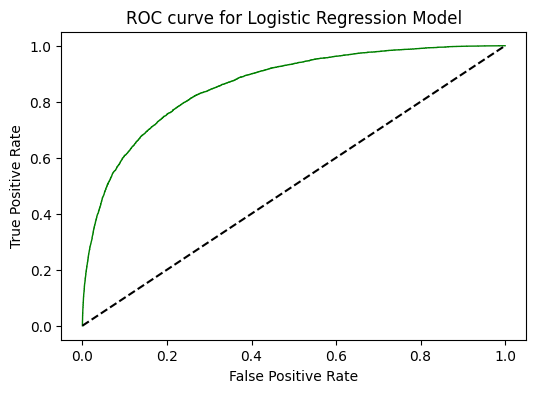

In [85]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [86]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7119586532221237


#### Finding whether model performance can be improved using Cross Validation Score

In [87]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]


In [88]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8433847578355673


##### The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation

<hr style="height:1px">

## model training using cat boost

In [91]:
from catboost import CatBoostClassifier

#### Model Training

In [92]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

Learning rate set to 0.041591
0:	total: 246ms	remaining: 8m 11s
1:	total: 307ms	remaining: 5m 6s
2:	total: 341ms	remaining: 3m 47s
3:	total: 385ms	remaining: 3m 12s
4:	total: 445ms	remaining: 2m 57s
5:	total: 587ms	remaining: 3m 15s
6:	total: 674ms	remaining: 3m 11s
7:	total: 749ms	remaining: 3m 6s
8:	total: 837ms	remaining: 3m 5s
9:	total: 945ms	remaining: 3m 8s
10:	total: 1.02s	remaining: 3m 4s
11:	total: 1.1s	remaining: 3m 3s
12:	total: 1.27s	remaining: 3m 13s
13:	total: 1.37s	remaining: 3m 14s
14:	total: 1.48s	remaining: 3m 16s
15:	total: 1.61s	remaining: 3m 20s
16:	total: 1.74s	remaining: 3m 23s
17:	total: 1.93s	remaining: 3m 32s
18:	total: 2.2s	remaining: 3m 49s
19:	total: 2.43s	remaining: 4m
20:	total: 2.74s	remaining: 4m 18s
21:	total: 2.87s	remaining: 4m 17s
22:	total: 3.05s	remaining: 4m 22s
23:	total: 3.15s	remaining: 4m 19s
24:	total: 3.29s	remaining: 4m 19s
25:	total: 3.36s	remaining: 4m 15s
26:	total: 3.41s	remaining: 4m 9s
27:	total: 3.46s	remaining: 4m 3s
28:	total: 3.5

In [93]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 77.60611248016357


#### Model Testing

In [94]:
y_pred_cat = cat_classifier.predict(X_test)

In [95]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))

Accuracy Score: 0.8644300838718548


#### Checking for Overfitting and Under Fitting

In [96]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

Train Data Score: 0.891963426371511
Test Data Score: 0.8644300838718548


#### Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data

In [105]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

Confusion Matrix:

 [[21633  1093]
 [ 2851  3515]]


In [106]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

classification_report:

               precision    recall  f1-score   support

           0       0.88      0.95      0.92     22726
           1       0.76      0.55      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [98]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [99]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

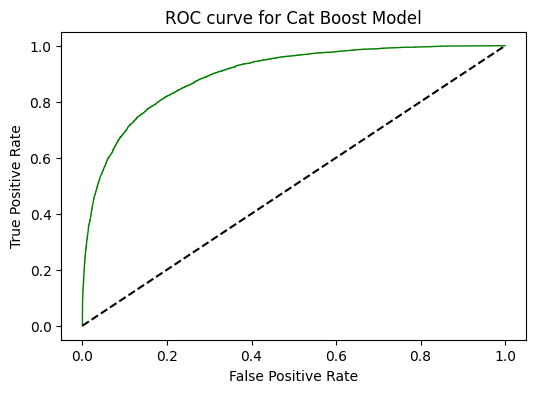

In [100]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [101]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

ROC AUC Scores: 0.7520286822521376


#### Finding whether model performance can be improved using Cross Validation Score

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Learning rate set to 0.037811
0:	total: 35.5ms	remaining: 1m 11s
1:	total: 63.3ms	remaining: 1m 3s
2:	total: 87ms	remaining: 57.9s
3:	total: 111ms	remaining: 55.3s
4:	total: 135ms	remaining: 53.8s
5:	total: 157ms	remaining: 52s
6:	total: 178ms	remaining: 50.8s
7:	total: 201ms	remaining: 50s
8:	total: 221ms	remaining: 48.8s
9:	total: 248ms	remaining: 49.3s
10:	total: 279ms	remaining: 50.5s
11:	total: 302ms	remaining: 50.1s
12:	total: 328ms	remaining: 50.1s
13:	total: 349ms	remaining: 49.5s
14:	total: 370ms	remaining: 49s
15:	total: 392ms	remaining: 48.6s
16:	total: 415ms	remaining: 48.4s
17:	total: 442ms	remaining: 48.7s
18:	total: 470ms	remaining: 49s
19:	total: 496ms	remaining: 49.1s
20:	total: 520ms	remaining: 49s
21:	total: 545ms	remaining: 49s
22:	total: 569ms	remaining: 48.9s
23:	total: 592ms	remaining: 48.7s
24:	total: 612ms	remaining: 48.4s
25:	total: 634ms	remaining: 48.2s
26:	total: 665ms	remaining: 48.6s
27:	total: 692ms	remaining: 48.8s
28:	total: 713ms	remaining: 48.5s
29:	

In [103]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8633816657612394


#### The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8647050735597415. So, accuracy of model may not be improved using Cross-validation

<hr style="height:1px">

## model training using random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [108]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 61.73689818382263


#### Model Testing 

In [109]:
y_pred_rf = classifier_rf.predict(X_test)

In [110]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.8567647463220129


In [111]:
# Checking for Overfitting and Under Fitting
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 0.9999742197167606
Test Data Score: 0.8567647463220129


##### Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.

# Results and Conclusion

#### Best Models in terms of accuracy 
#####    1) Cat Boost Model
#####    2) Logistic Regression
#####    3) Random Forest
#### Best Models in terms of Computation Time 
#####    1) Logistic Regression
#####    2) Random Forest
#####    3) Cat Boost Model
        

## Conclusion:

The accuracy score of Cat Boost Model is high when compared with accuracy scores of Logistic Regression and Random Forest. But cat Boost model consumes lot of time to train the model.

In terms of computation time and Accuracy score, logistic Regression model is the best choice.


## Saving Classifier Object into Pickle File

In [112]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [113]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)